#### This code reproduces the findings of the following scientific article, accepted for publication in npj Materials Degradation journal on 25 September 2023:
### Estimating pitting descriptors of 316L stainless steel by machine learning and statistical analysis
#### _Leonardo Bertolucci Coelho$^{1,2,*}$, Daniel Torres$^{1}$, Vincent Vangrunderbeek$^{2}$, Miguel Bernal$^{1}$, Gian Marco Paldino$^{3}$, Gianluca Bontempi$^{3}$, Jon Ustarroz$^{1,2}$_ 

_$^{1}$ChemSIN – Chemistry of Surfaces, Interfaces and Nanomaterials, Université libre de Bruxelles (ULB), Brussels, Belgium_ 

_$^{2}$Research Group Electrochemical and Surface Engineering (SURF), Vrije Universiteit Brussel, Brussels, Belgium_

_$^{3}$Machine Learning Group (MLG), Université libre de Bruxelles (ULB), Brussels, Belgium_

_*leonardo.bertolucci.coelho@ulb.be_

# 0.01 M NaCl, 50 mV/s

In [53]:
# Import the required libraries
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import sklearn
from scipy.stats import kde
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
from sklearn import metrics
from sklearn.metrics import r2_score

### datasets uploaded below can be downloaded at: https://data.mendeley.com/datasets/78rz8vw46x/2
Bertolucci Coelho, Leonardo (2023), “Micro-scale potentiodynamic polarisation curves of 316L stainless steel ”, Mendeley Data, V2, doi: 10.17632/78rz8vw46x.2

In [54]:
# choosing the directory for uploading the datasets
os.chdir(r"C:\Users\lbertolu\OneDrive - Vrije Universiteit Brussel\ULB\SECCM tests\pitting statistics paper draft\paper1")

# getting the current directory
%pwd

'C:\\Users\\lbertolu\\OneDrive - Vrije Universiteit Brussel\\ULB\\SECCM tests\\pitting statistics paper draft\\paper1'

In [55]:
df_E=pd.read_csv('E(V)_0.01_M_NaCl_50_mV_per_s.csv') 
E=df_E["E (V)"]
E

0       0.499893
1       0.500198
2       0.500504
3       0.501114
4       0.501419
          ...   
2213    1.352885
2214    1.353191
2215    1.353801
2216    1.354106
2217    1.354412
Name: E (V), Length: 2218, dtype: float64

In [56]:
df=pd.read_csv('j_uA-cm2_0.01_M_NaCl_50_mV_per_s.csv') 
df

0            1            2            3            4  \
0      660.575361   126.286465   174.858185   165.143842   165.143842   
1      650.860989   126.286465   155.429498   174.858185   165.143842   
2      699.432753   184.572516   136.000808   155.429498   184.572516   
3      660.575361    87.429094   165.143842   136.000808   136.000808   
4      514.860193   155.429498   145.715152   194.286859   136.000808   
...           ...          ...          ...          ...          ...   
2213  7888.046839  1923.440008  1816.582202  1729.153044  1573.723663   
2214  8033.762102  1972.011710  1836.010851  1709.724395  1602.866589   
2215  8179.476728  1952.582934  1855.439531  1797.153553  1583.437940   
2216  8024.047284  1972.011710  1806.867798  1758.296097  1593.152312   
2217  7994.904741  1952.582934  1787.439149  1797.153553  1622.295365   

                5            6            7            8            9  ...  \
0      165.143842   155.429498   184.572516   184.572516   165.143842  ...   
1      204.001206   155.429498   174.858185   136.000808   174.858185  ...   
2      145.715152   165.143842   165.143842   136.000808   184.572516  ...   
3      145.715152   165.143842   136.000808   165.143842   116.572118  ...   
4      145.715152   145.715152   155.429498   136.000808   155.429498  ...   
...           ...          ...          ...          ...          ...  ...   
2213  1136.578161  1136.578161  1049.149035  1466.865857  1360.008050  ...   
2214  1126.863789  1117.149512   952.005600  1476.580134  1437.722804  ...   
2215  1107.435140  1097.720736  1020.006109  1457.151485  1369.722454  ...   
2216  1107.435140  1126.863789   981.148653  1476.580134  1398.865475  ...   
2217  1146.292565  1097.720736  1049.149035  1447.437208  1408.579752  ...   

                109           110           111           112           113  \
0        126.286465    174.858185    126.286465    223.429893    281.715947   
1        126.286465    184.572516    106.857775    213.715549    242.858570   
2        204.001206    116.572118    184.572516    262.287257    281.715947   
3        116.572118    126.286465    155.429498    213.715549    281.715947   
4         97.143431    145.715152     87.429094    155.429498    165.143842   
...             ...           ...           ...           ...           ...   
2213  165784.984697  16922.386783  18874.968062  17621.818964  20477.835319   
2214  169126.716474  17048.672411  20536.122316  18000.677757  20759.551028   
2215  172011.874099  17845.249586  23100.707826  18321.251144  20740.123302   
2216  172876.448313  18010.392574  25373.864402  18398.966503  21332.697580   
2217  172857.025044  17738.391684  26792.158717  18243.536104  21624.128425   

                114           115           116           117            118  
0        330.287696    223.429893    155.429498    126.286465     136.000808  
1        330.287696    155.429498     48.571714    116.572118     184.572516  
2        310.858993    194.286859    194.286859    194.286859     145.715152  
3        291.430307    184.572516    184.572516     58.286061     204.001206  
4        291.430307    165.143842    223.429893    136.000808     106.857775  
...             ...           ...           ...           ...            ...  
2213   90770.825961  21643.556151  53807.746146  53545.461983  857139.620771  
2214   92616.552202  21730.986009  53176.314825  51981.452724  859446.065831  
2215   92927.410454  23052.137239  51758.021465  50194.012206  861718.512213  
2216   96609.144936  23129.850688  51563.734660  48814.574934  864277.534576  
2217  100475.454588  23858.427322  52156.306710  46638.560805  866749.126763  

[2218 rows x 119 columns]

#### filling missing values of j

In [57]:
# Multivariate imputer that estimates each feature from all the others.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_imputer = IterativeImputer()

# The Iterative Imputer models each feature with missing values as a function of other features, iteratively.
j_nan_filled=iter_imputer.fit_transform(df)
df=pd.DataFrame(j_nan_filled,columns=df.columns)

In [58]:
df_log=np.log10(df)

In [59]:
iter_imputer_log = IterativeImputer()

j_nan_filled_log=iter_imputer_log.fit_transform(df_log)
df_log=pd.DataFrame(j_nan_filled_log,columns=df_log.columns)
df_log

0         1         2         3         4         5         6  \
0     2.819922  2.101357  2.242686  2.217862  2.217862  2.217862  2.191533   
1     2.813488  2.101357  2.191533  2.242686  2.217862  2.309633  2.191533   
2     2.844746  2.266167  2.133541  2.191533  2.266167  2.163505  2.217862   
3     2.819922  1.941656  2.217862  2.133541  2.133541  2.163505  2.217862   
4     2.711689  2.191533  2.163505  2.288443  2.133541  2.163505  2.163505   
...        ...       ...       ...       ...       ...       ...       ...   
2213  3.896969  3.284079  3.259255  3.237833  3.196928  3.055599  3.055599   
2214  3.904919  3.294909  3.263875  3.232926  3.204897  3.051871  3.048111   
2215  3.912726  3.290609  3.268447  3.254585  3.199601  3.044318  3.040492   
2216  3.904393  3.294909  3.256926  3.245092  3.202257  3.044318  3.051871   
2217  3.902813  3.290609  3.252231  3.254585  3.210130  3.059295  3.040492   

             7         8         9  ...       109       110       111  \
0     2.266167  2.266167  2.217862  ...  2.101357  2.242686  2.101357   
1     2.242686  2.133541  2.242686  ...  2.101357  2.266167  2.028806   
2     2.217862  2.133541  2.266167  ...  2.309633  2.066595  2.266167   
3     2.133541  2.217862  2.066595  ...  2.066595  2.101357  2.191533   
4     2.191533  2.133541  2.191533  ...  1.987413  2.163505  1.941656   
...        ...       ...       ...  ...       ...       ...       ...   
2213  3.020837  3.166390  3.133541  ...  5.219545  4.228462  4.275886   
2214  2.978640  3.169257  3.157675  ...  5.228212  4.231691  4.312518   
2215  3.008603  3.163505  3.136633  ...  5.235558  4.251523  4.363625   
2216  2.991735  3.169257  3.145776  ...  5.237736  4.255523  4.404387   
2217  3.020837  3.160600  3.148781  ...  5.237687  4.248914  4.428008   

           112       113       114       115       116       117       118  
0     2.349141  2.449811  2.518892  2.349141  2.191533  2.101357  2.133541  
1     2.329836  2.385353  2.518892  2.191533  1.686383  2.066595  2.266167  
2     2.418777  2.449811  2.492563  2.288443  2.288443  2.288443  2.163505  
3     2.329836  2.449811  2.464535  2.266167  2.266167  1.765565  2.309633  
4     2.191533  2.217862  2.464535  2.217862  2.349141  2.133541  2.028806  
...        ...       ...       ...       ...       ...       ...       ...  
2213  4.246051  4.311284  4.957946  4.335329  4.730845  4.728723  5.933052  
2214  4.255289  4.317218  4.966689  4.337079  4.725718  4.715848  5.934219  
2215  4.262955  4.316811  4.968144  4.362711  4.713978  4.700652  5.935365  
2216  4.264793  4.329046  4.985018  4.364173  4.712344  4.688550  5.936653  
2217  4.261109  4.334939  5.002060  4.377642  4.717307  4.668745  5.937893  

[2218 rows x 119 columns]

### exporting the log(j) curves (missing values filled) as a CSV file

In [64]:
os.chdir(r"C:\Users\lbertolu\OneDrive - Vrije Universiteit Brussel\ULB\SECCM tests\pitting statistics paper draft\pape2")

df_log.to_csv('logj_uA-cm2_0.01_M_NaCl_50_mV_per_s.csv', index=False)

#### dataset exported above is permanently stored at: https://data.mendeley.com/datasets/7j6b6y48jw/1
Bertolucci Coelho, Leonardo; Ustarroz, Jon (2023), “Micro-scale potentiodynamic polarisation (log(j)) curves of 316L stainless steel”, Mendeley Data, V1, doi: 10.17632/7j6b6y48jw.1

In [61]:
df_log.columns= df_log.columns.astype(int) # converting to int the str cols (Maps) 

### plotting the raw and smoothed log(j) Vs E curves

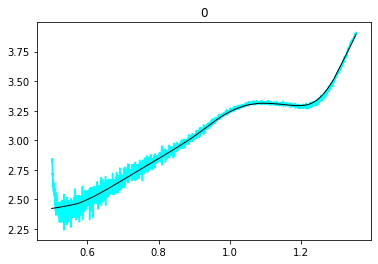

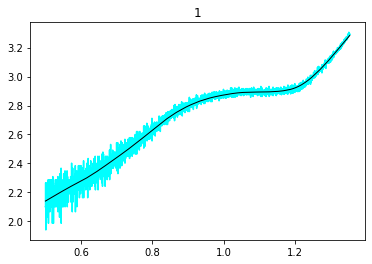

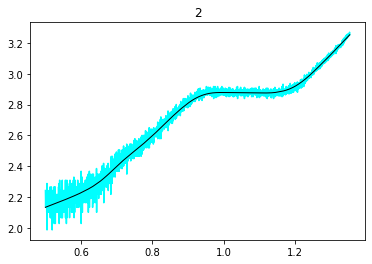

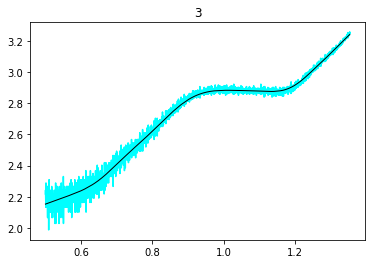

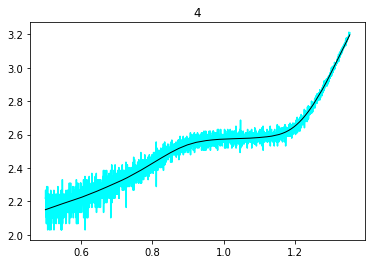

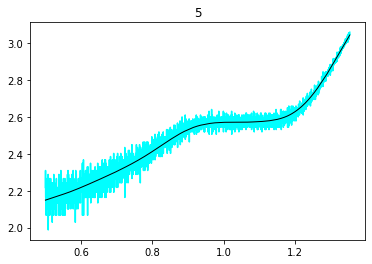

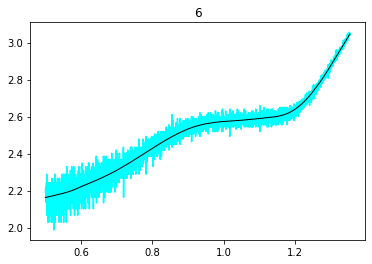

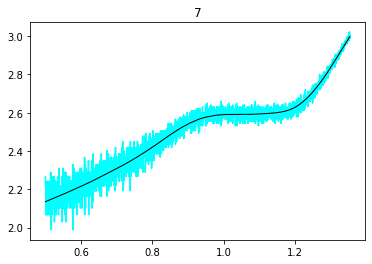

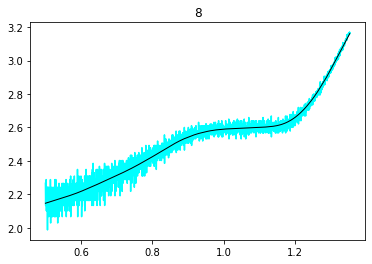

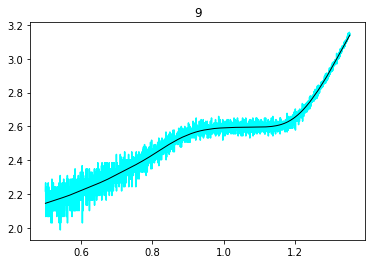

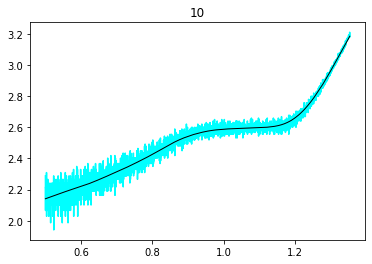

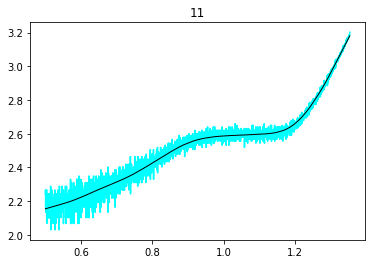

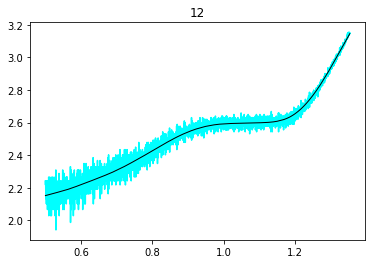

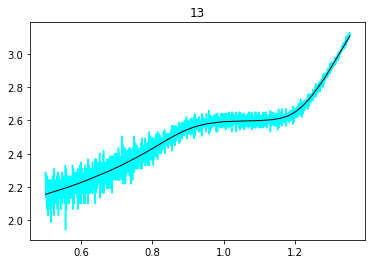

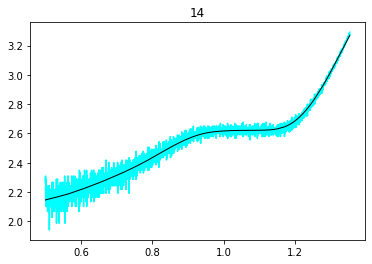

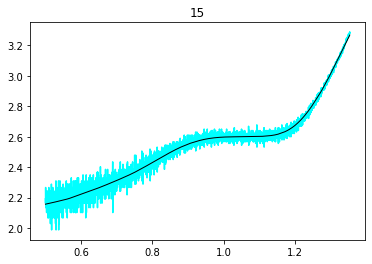

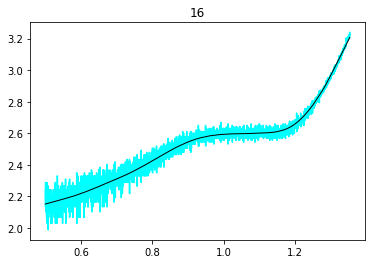

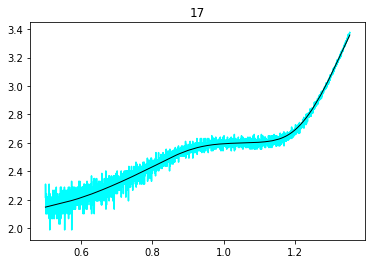

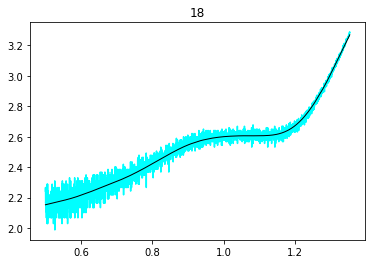

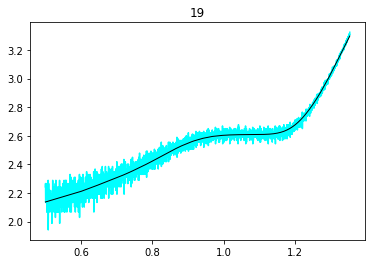

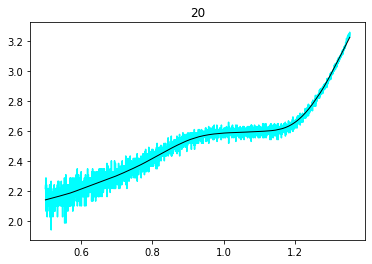

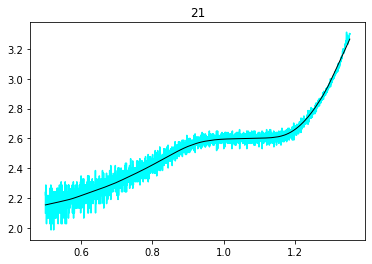

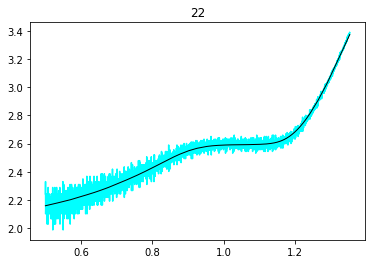

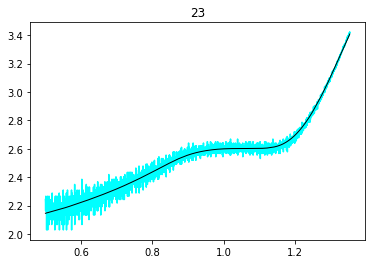

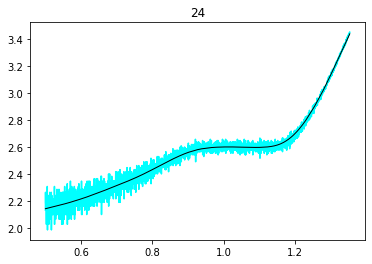

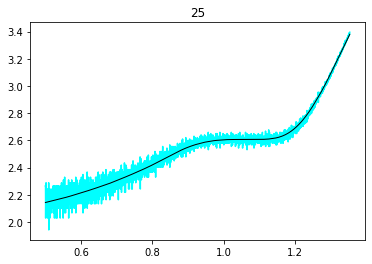

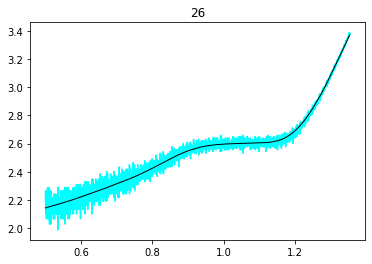

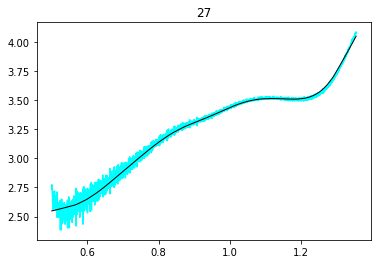

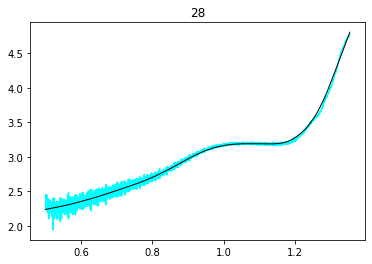

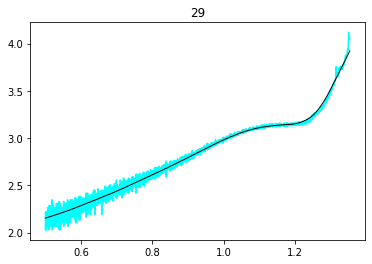

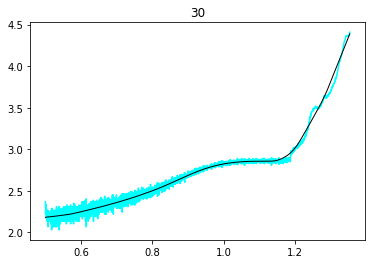

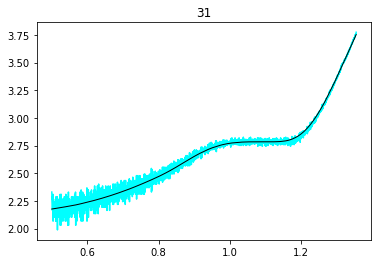

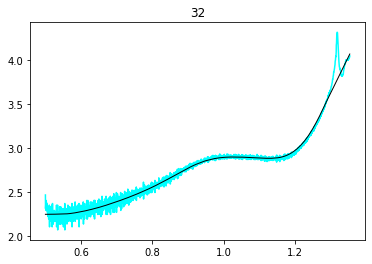

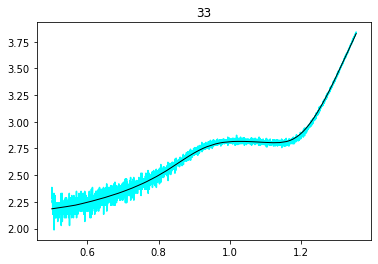

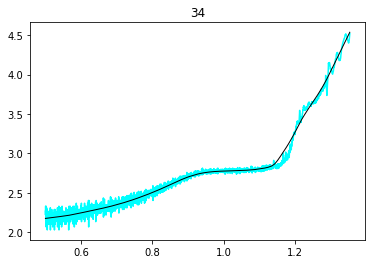

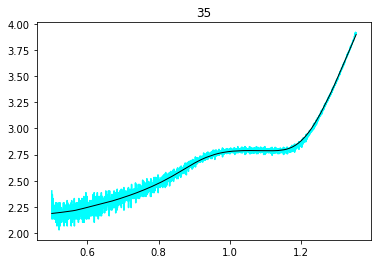

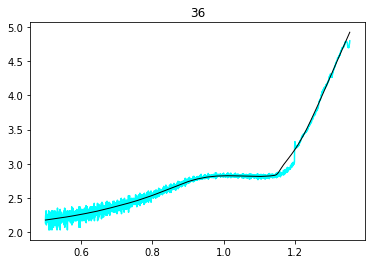

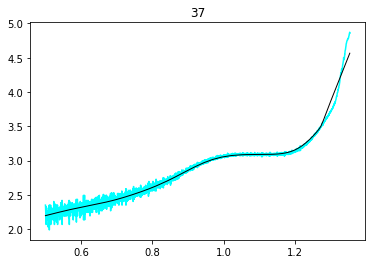

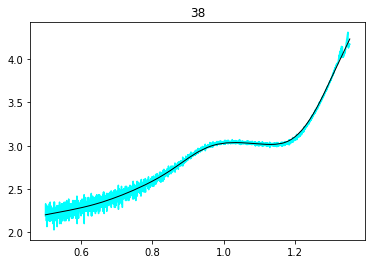

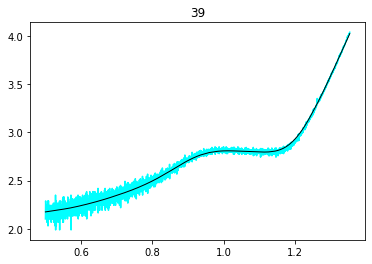

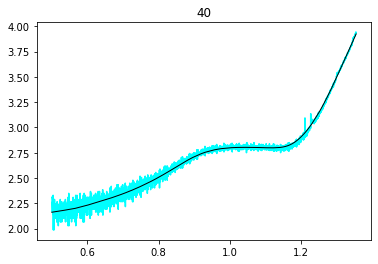

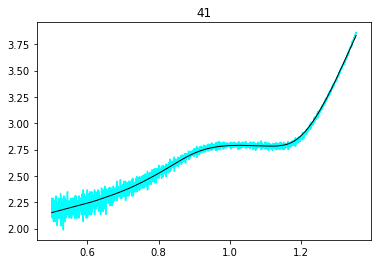

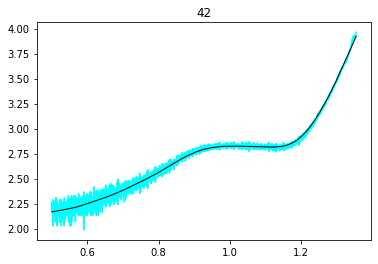

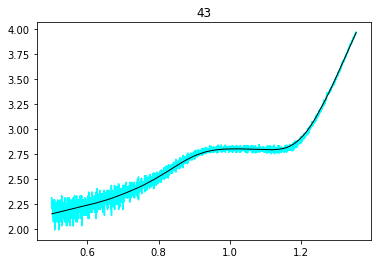

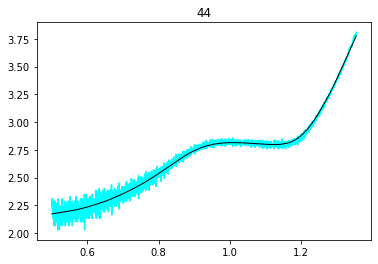

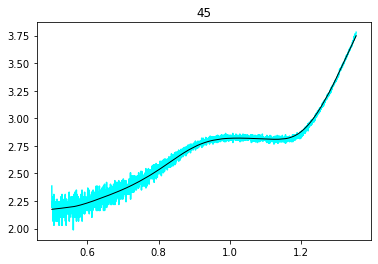

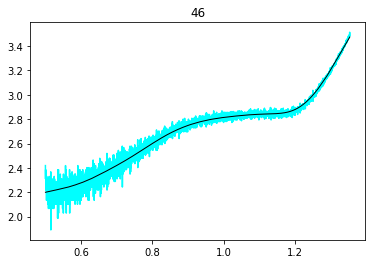

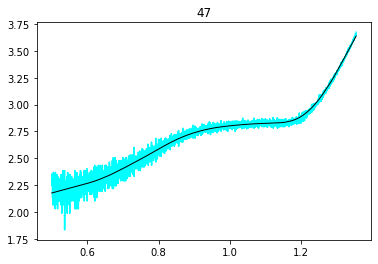

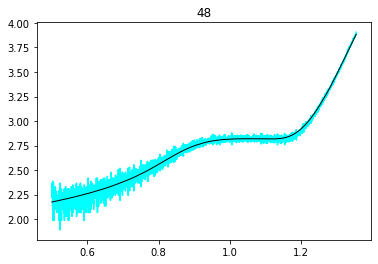

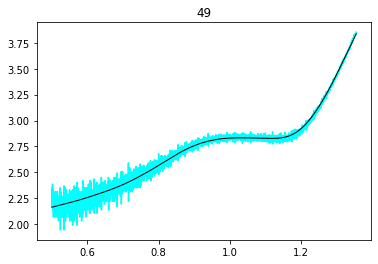

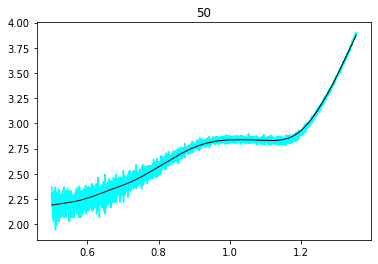

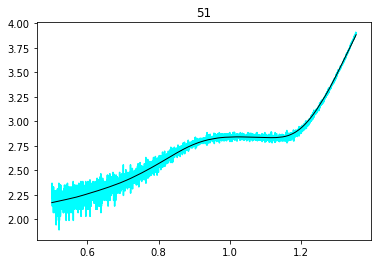

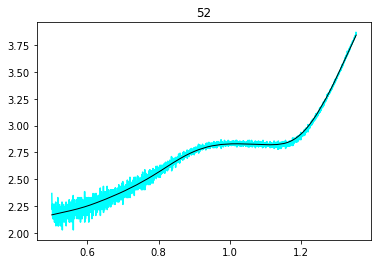

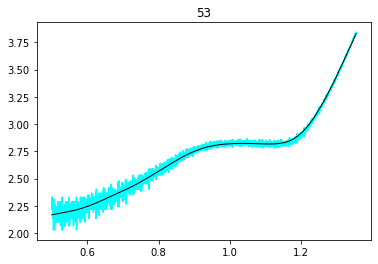

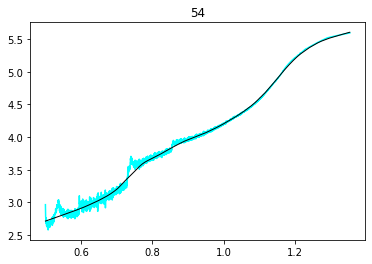

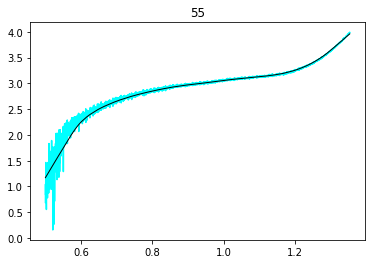

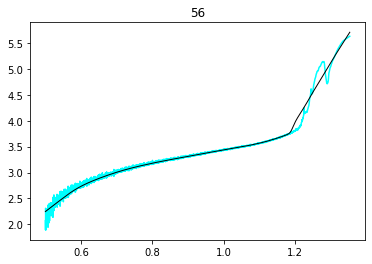

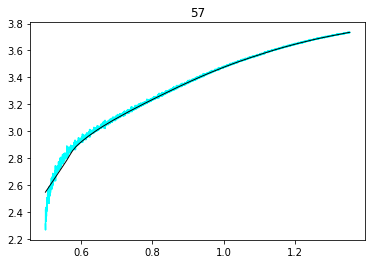

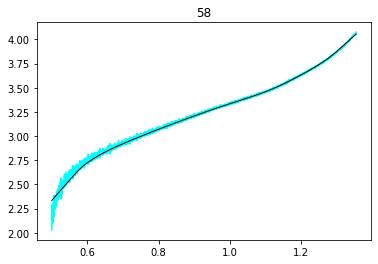

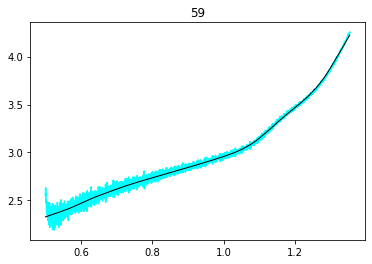

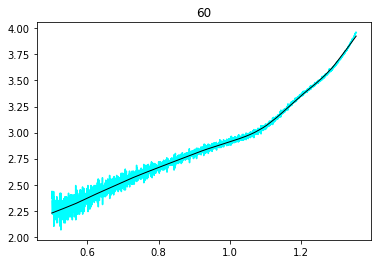

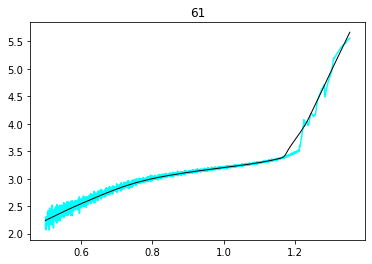

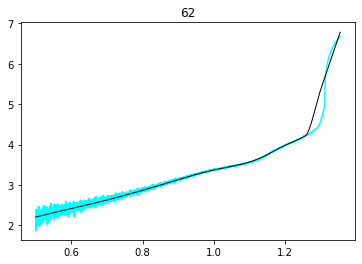

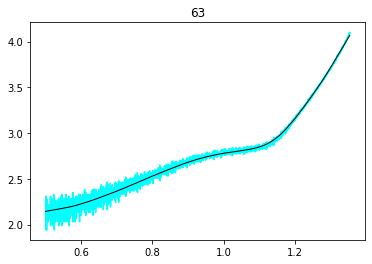

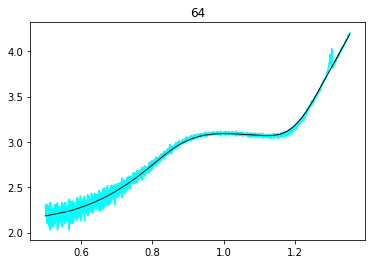

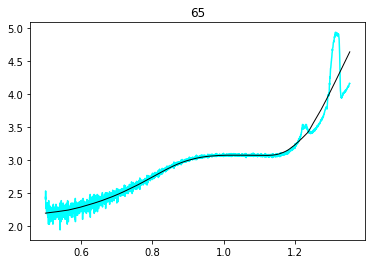

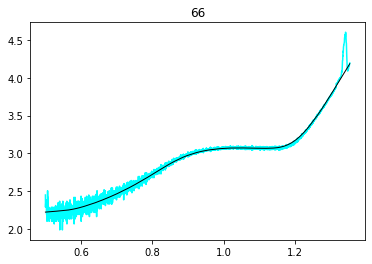

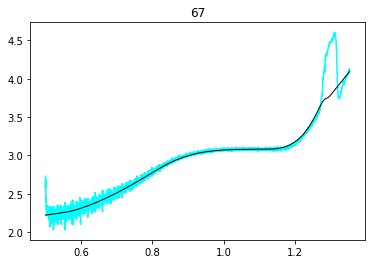

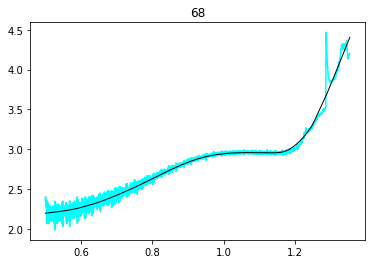

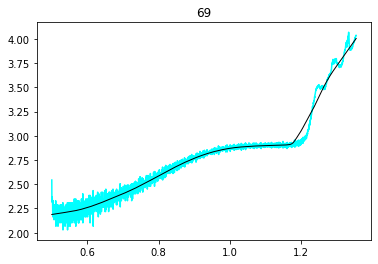

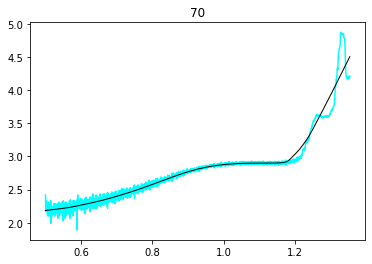

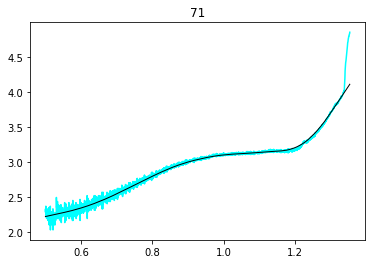

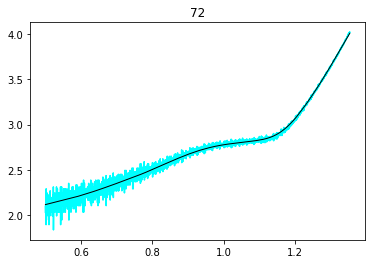

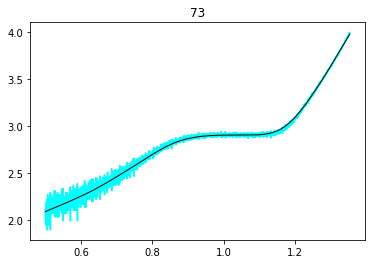

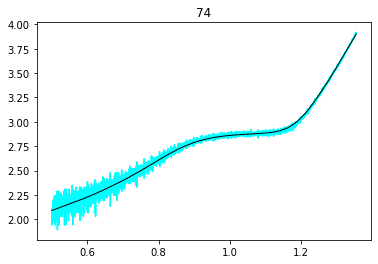

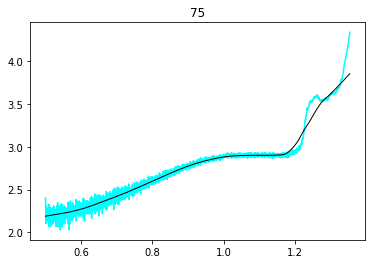

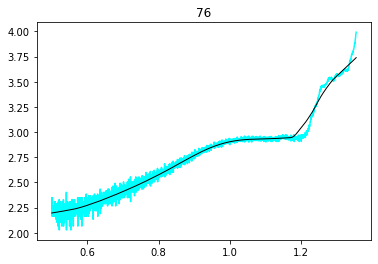

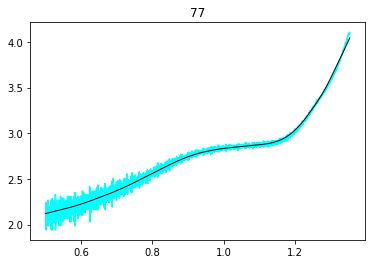

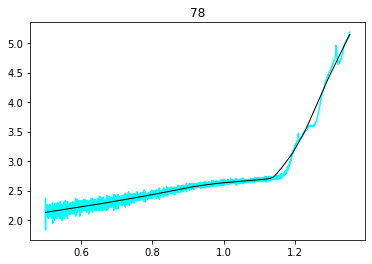

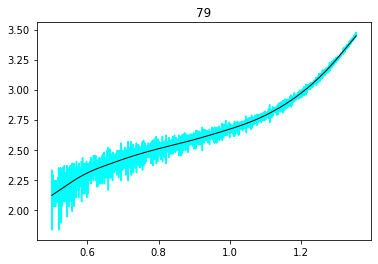

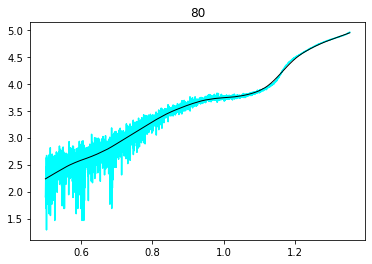

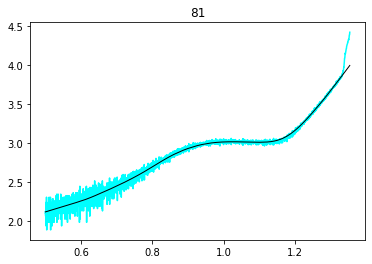

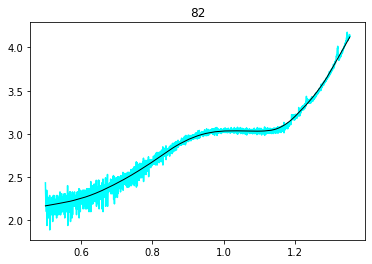

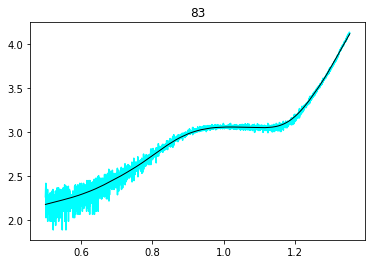

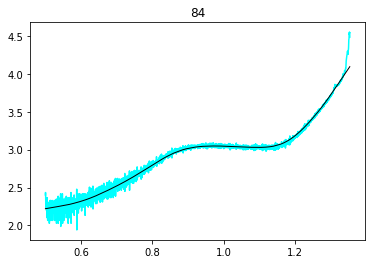

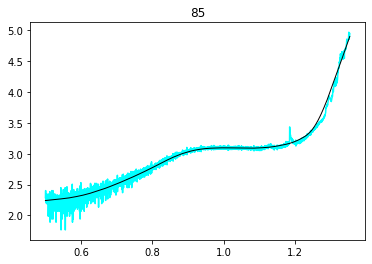

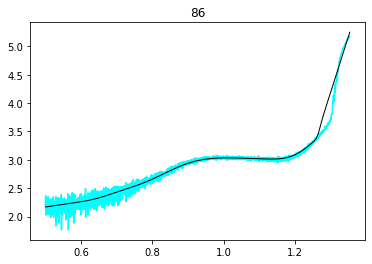

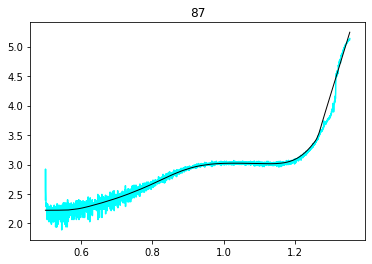

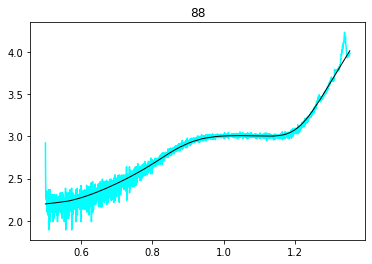

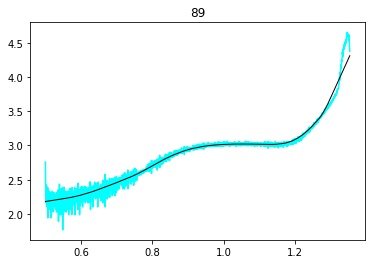

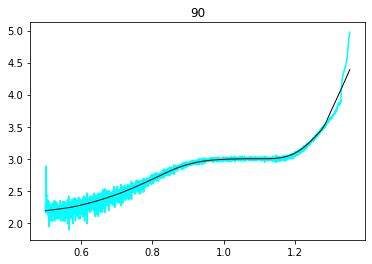

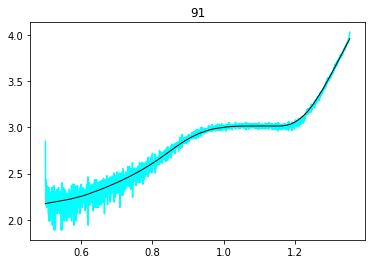

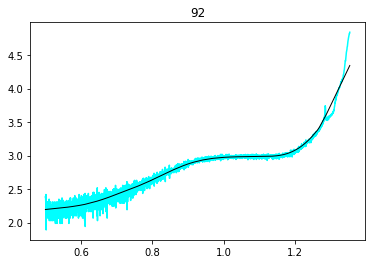

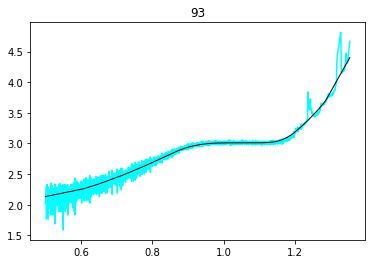

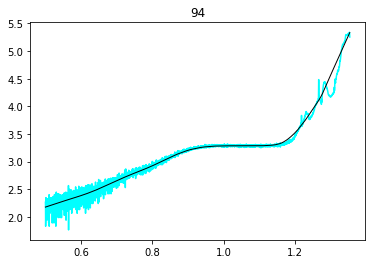

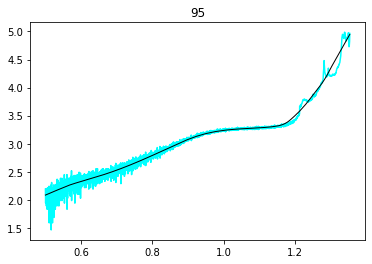

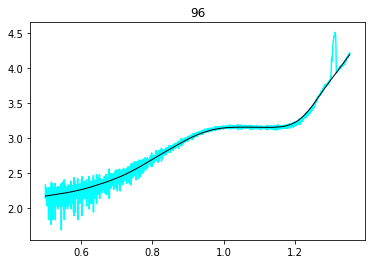

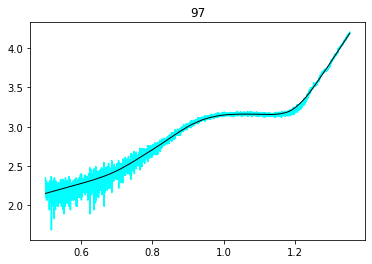

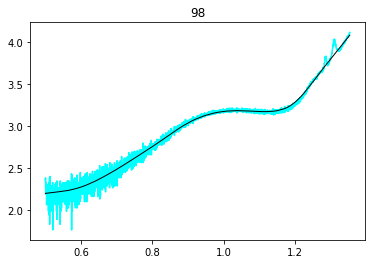

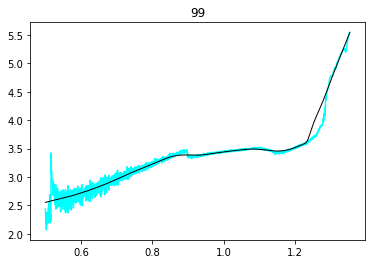

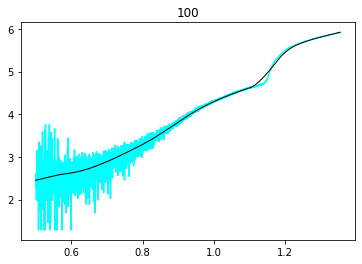

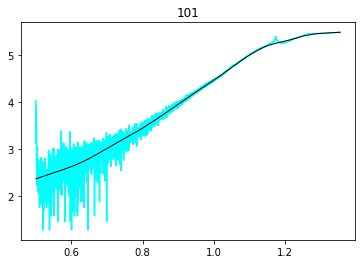

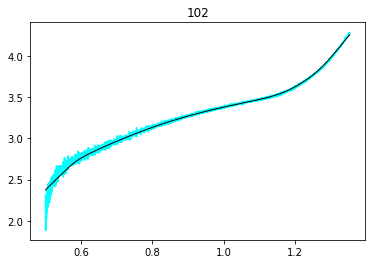

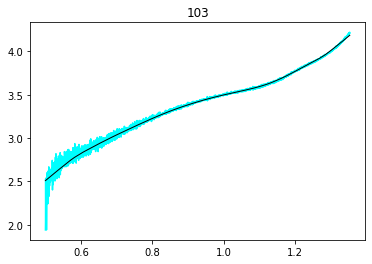

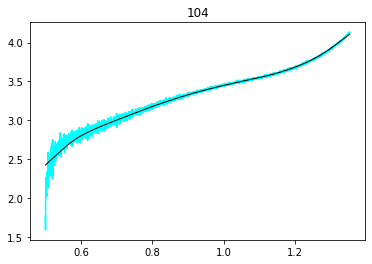

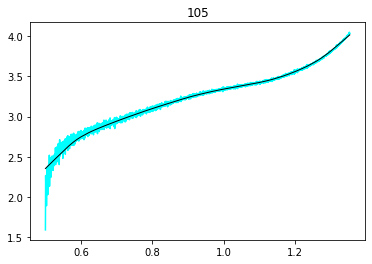

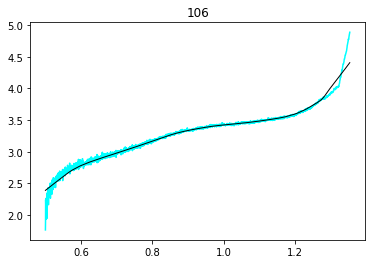

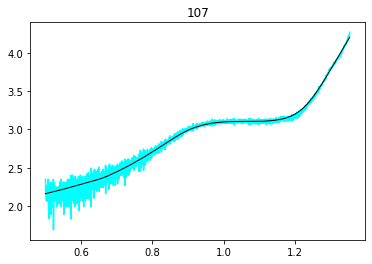

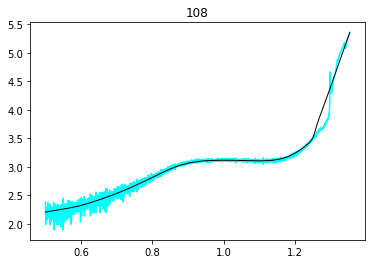

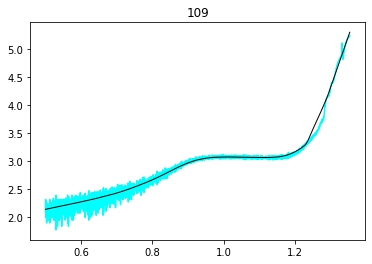

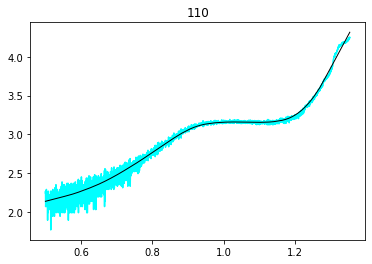

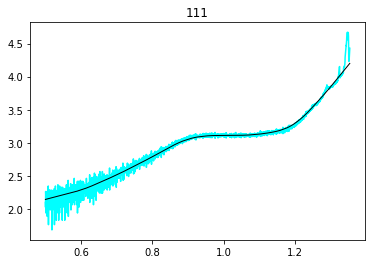

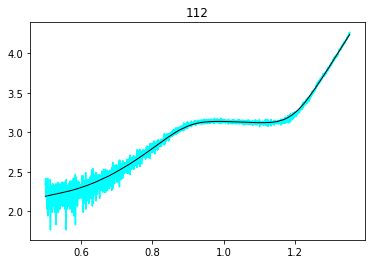

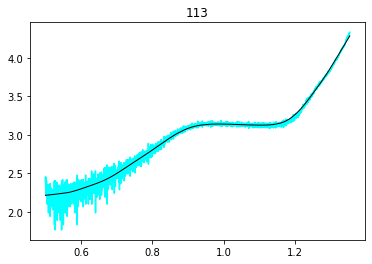

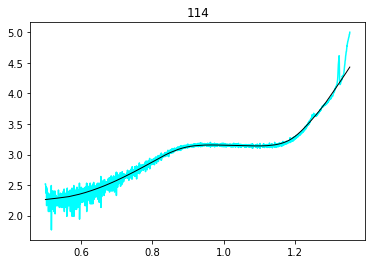

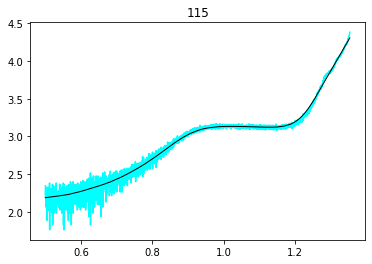

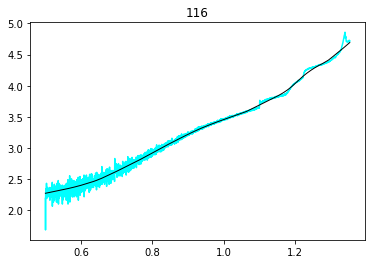

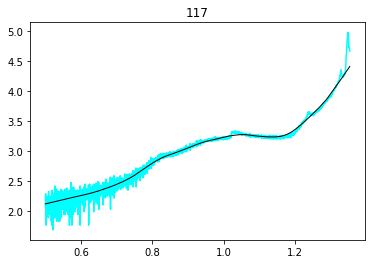

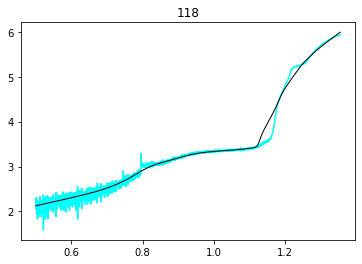

In [12]:
plt.rcParams.update({'figure.max_open_warning': 0})

column_names =  df_log.columns
for index, column in enumerate(column_names):
    fig, ax = plt.subplots() 
        
    lowess = sm.nonparametric.lowess
    ylow = lowess(df_log[column],E,frac= 0.15,return_sorted=False)

    ax.plot(E , df_log[column], color = "cyan")
    ax.plot(E , ylow, linewidth = 1, color = "black")
    ax.set_title(column)

### storing the smoothed log(j) in a df

In [26]:
df_ylow_log = df_log.copy()

column_names =  df_log.columns
for index, column in enumerate(column_names):
        
    lowess = sm.nonparametric.lowess
    ylow = lowess(df_log[column],E,frac= 0.15,return_sorted=False) 
    df_ylow_log[column]=ylow
    
df_ylow_log

0         1         2         3         4         5         6    \
0     2.424033  2.140670  2.133968  2.152759  2.150012  2.148872  2.162704   
1     2.424173  2.141115  2.134239  2.153008  2.150244  2.149064  2.162829   
2     2.424313  2.141559  2.134509  2.153257  2.150475  2.149256  2.162954   
3     2.424594  2.142447  2.135051  2.153755  2.150938  2.149640  2.163205   
4     2.424734  2.142891  2.135321  2.154004  2.151169  2.149832  2.163331   
...        ...       ...       ...       ...       ...       ...       ...   
2213  3.885965  3.279265  3.248571  3.237247  3.190281  3.039023  3.040205   
2214  3.887860  3.280166  3.249314  3.237941  3.191615  3.040043  3.041181   
2215  3.891651  3.281968  3.250801  3.239331  3.194282  3.042083  3.043133   
2216  3.893548  3.282870  3.251545  3.240026  3.195616  3.043103  3.044109   
2217  3.895445  3.283771  3.252288  3.240721  3.196951  3.044124  3.045085   

           7         8         9    ...       109       110       111  \
0     2.135128  2.146787  2.144888  ...  2.133659  2.134784  2.146625   
1     2.135362  2.146990  2.145096  ...  2.134060  2.135140  2.147048   
2     2.135596  2.147193  2.145304  ...  2.134460  2.135496  2.147470   
3     2.136063  2.147599  2.145720  ...  2.135262  2.136207  2.148315   
4     2.136297  2.147801  2.145928  ...  2.135662  2.136563  2.148738   
...        ...       ...       ...  ...       ...       ...       ...   
2213  2.992827  3.155326  3.134755  ...  5.272041  4.304203  4.189940   
2214  2.993748  3.156566  3.135931  ...  5.277625  4.306814  4.191961   
2215  2.995591  3.159045  3.138282  ...  5.288791  4.312034  4.196006   
2216  2.996512  3.160285  3.139458  ...  5.294374  4.314643  4.198030   
2217  2.997433  3.161525  3.140634  ...  5.299956  4.317251  4.200053   

           112       113       114       115       116       117       118  
0     2.191444  2.215309  2.263208  2.191597  2.274326  2.120597  2.127322  
1     2.191727  2.215448  2.263399  2.191772  2.274682  2.121034  2.127851  
2     2.192010  2.215587  2.263591  2.191948  2.275038  2.121470  2.128380  
3     2.192577  2.215865  2.263974  2.192301  2.275750  2.122344  2.129439  
4     2.192860  2.216005  2.264166  2.192478  2.276107  2.122780  2.129968  
...        ...       ...       ...       ...       ...       ...       ...  
2213  4.228717  4.275541  4.418004  4.289605  4.686805  4.397982  5.981882  
2214  4.230915  4.277928  4.420728  4.292078  4.688331  4.400637  5.983627  
2215  4.235312  4.282705  4.426177  4.297024  4.691387  4.405949  5.987114  
2216  4.237511  4.285094  4.428903  4.299497  4.692917  4.408606  5.988856  
2217  4.239709  4.287484  4.431630  4.301971  4.694448  4.411263  5.990596  

[2218 rows x 119 columns]

# Epit estimation by rule-based linear regression

## definition of classes of log(j) Vs E curves based on their qualitative degree of similarity 

### providing initial guesses for the Epit intervals and the Epass values (for improved accuracy of estimation)

#### optimized combination for the general class
Epit interval=[1.1,1.2]

Epass=0.9 

In [30]:
Epit_interval_lower = float(input(r"Enter a guess value (V) for the lower limit of the Epit interval: ")) #'r' --> a character following a backslash is included in the string without change
Epit_interval_upper = float(input(r"Enter a guess value (V) for the upper limit of the Epit interval: ")) #'r' --> a character following a backslash is included in the string without change
Epass_estimated = float(input(r"Enter a guess value (V) for Epass: ")) 
interval_lower_i=E[E>Epit_interval_lower].dropna().index[0]
interval_upper_i=E[E<Epit_interval_upper].dropna().index[-1]
Epass_estimated_i=E[E<Epass_estimated].dropna().index[-1]
print("Epit guessed interval: "+str(round(E[interval_upper_i]-E[interval_lower_i],3))+" V")
print("Epass estimated: "+str(round(E[Epass_estimated_i],3))+" V")

Enter a guess value (V) for the lower limit of the Epit interval: 1.1
Enter a guess value (V) for the upper limit of the Epit interval: 1.2
Enter a guess value (V) for Epass: 0.9
Epit guessed interval: 0.1 V
Epass estimated: 0.9 V


In [31]:
# class1 and class3: not distinguished by the underlying electrochemical behaviour, but the different curves' shapes require different input intervals for improved computation
no_passive_class=[54,57,101,116] # Epit=0.5 V by default
class1=[63,118] 
class3=[58,59,60,62,79,80,100,102,103,104,105,106] 
class3_Epass = [62,80,106] # Epass not nan 

#### optimized combination for class1 and class3
Epit interval=[1.05,1.1]

In [32]:
Epit_interval_lower2 = float(input(r"Enter a guess value (V) for the lower limit of the Epit interval: ")) #'r' --> a character following a backslash is included in the string without change
Epit_interval_upper2 = float(input(r"Enter a guess value (V) for the upper limit of the Epit interval: ")) #'r' --> a character following a backslash is included in the string without change
interval_lower_i2=E[E>Epit_interval_lower2].dropna().index[0]
interval_upper_i2=E[E<Epit_interval_upper2].dropna().index[-1]
print("Epit guessed interval: "+str(round(E[interval_upper_i2]-E[interval_lower_i2],3))+" V")

Enter a guess value (V) for the lower limit of the Epit interval: 1.05
Enter a guess value (V) for the upper limit of the Epit interval: 1.1
Epit guessed interval: 0.049 V


## plotting the Epit (E and log(j) pair values) estimated by linear regression

54 no passivity
57 no passivity
101 no passivity
116 no passivity


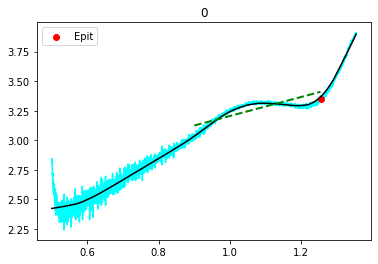

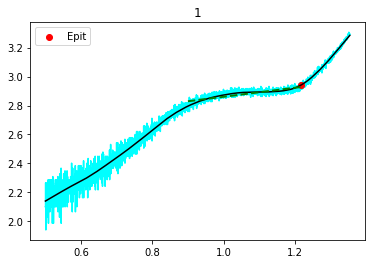

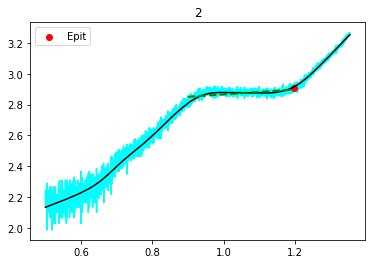

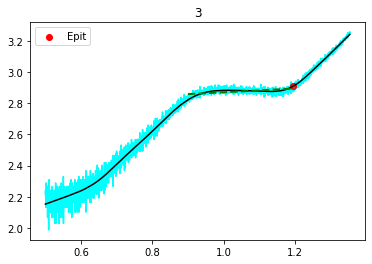

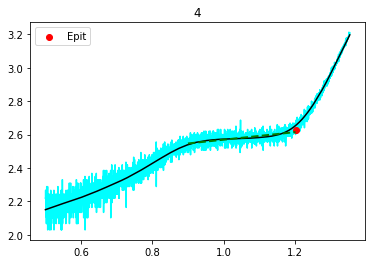

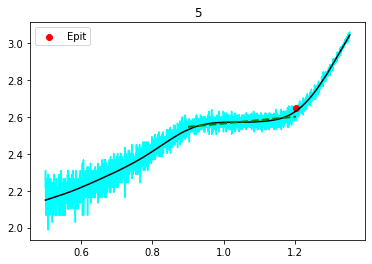

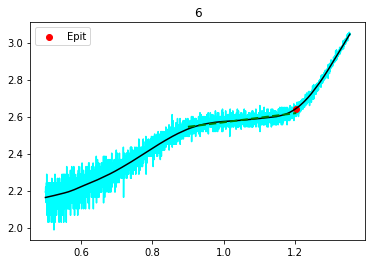

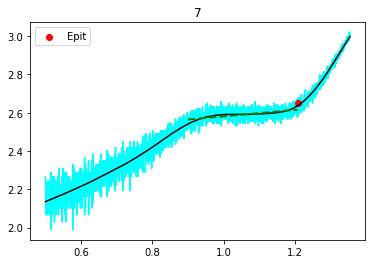

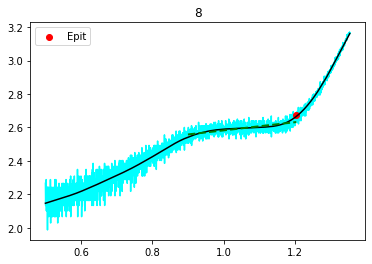

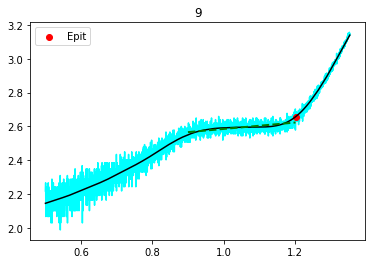

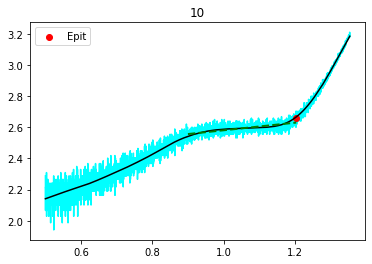

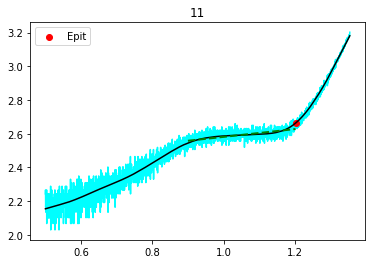

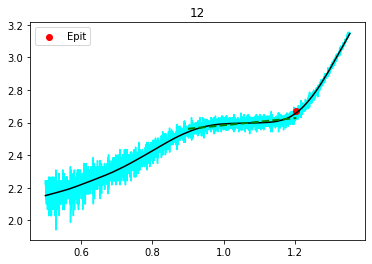

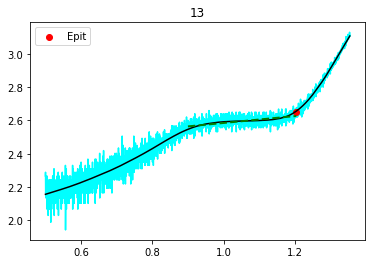

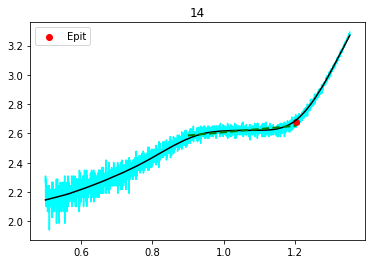

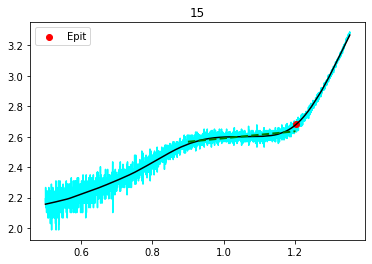

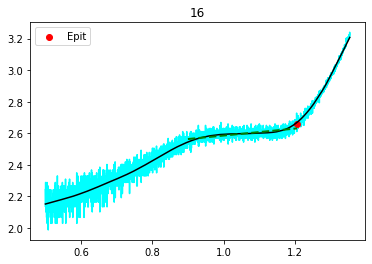

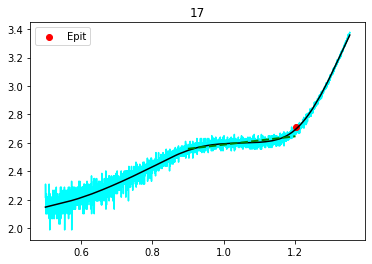

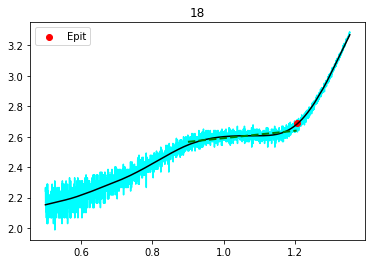

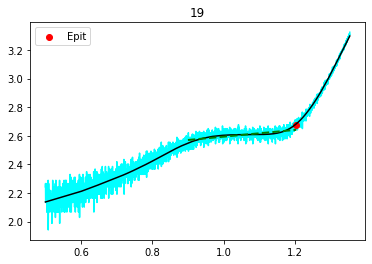

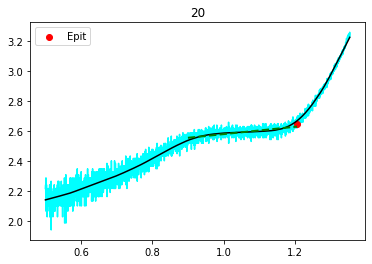

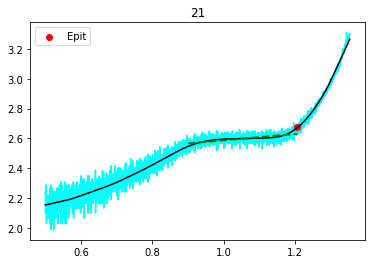

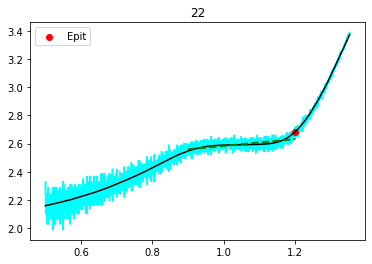

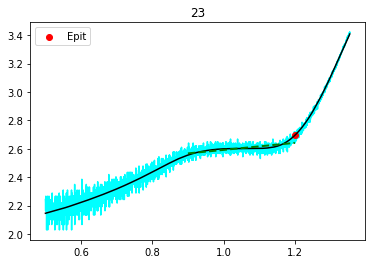

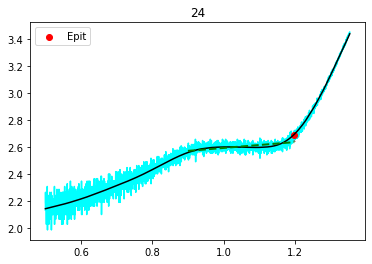

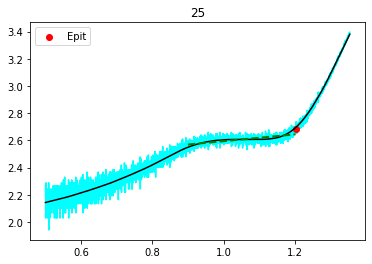

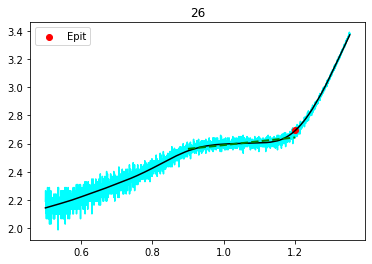

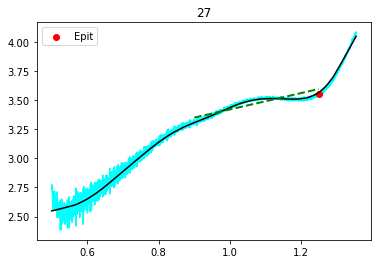

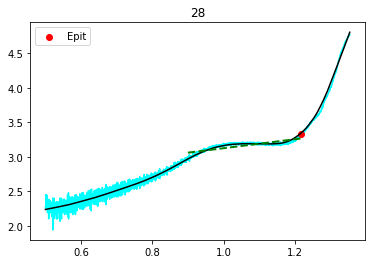

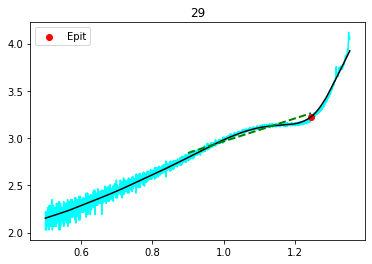

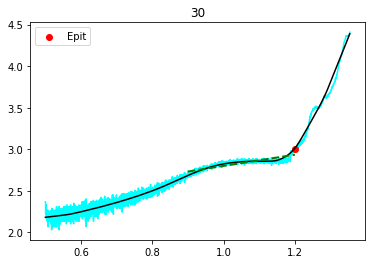

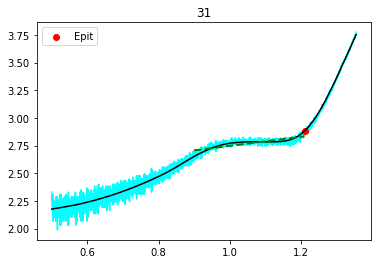

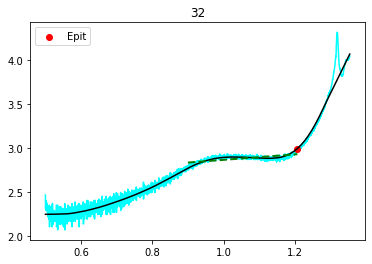

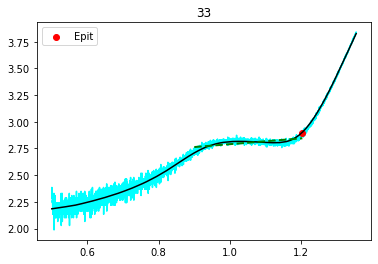

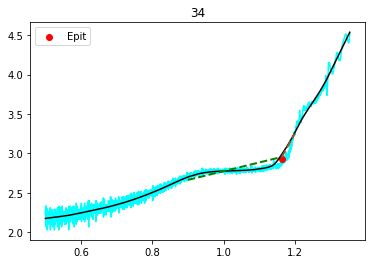

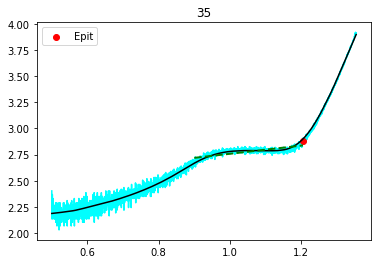

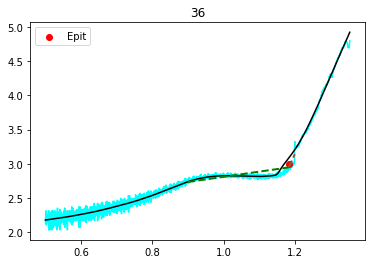

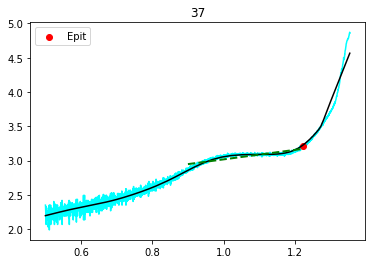

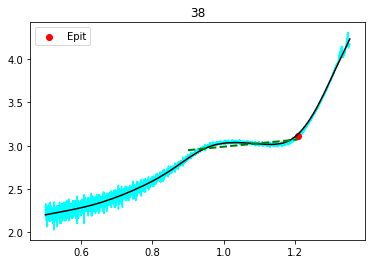

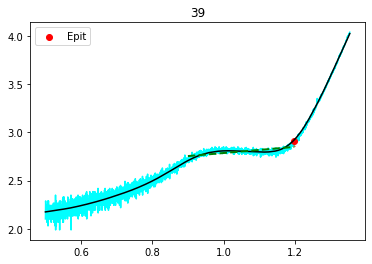

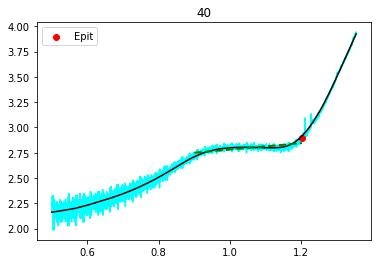

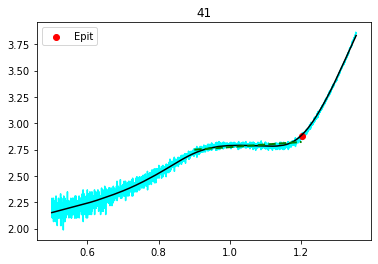

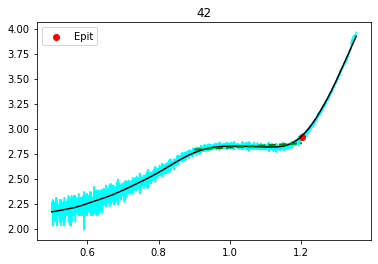

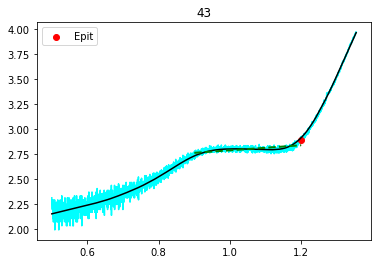

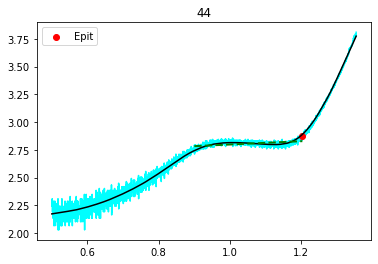

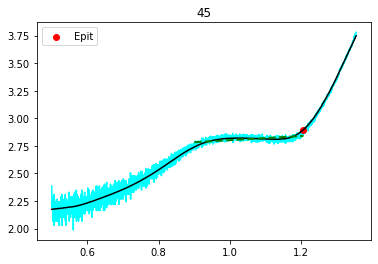

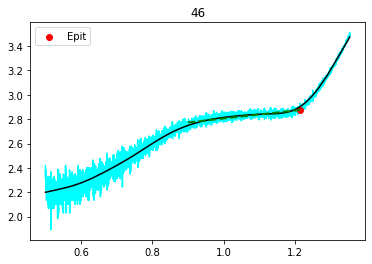

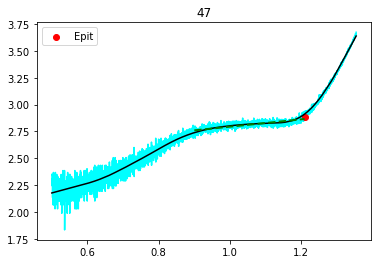

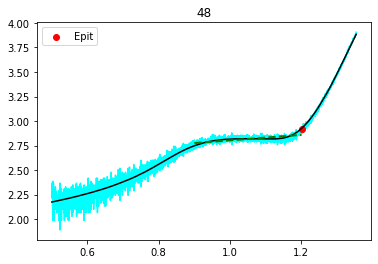

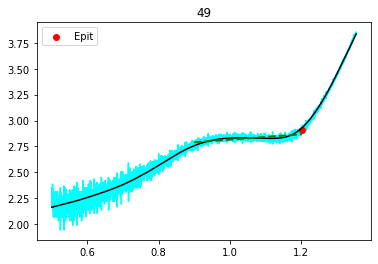

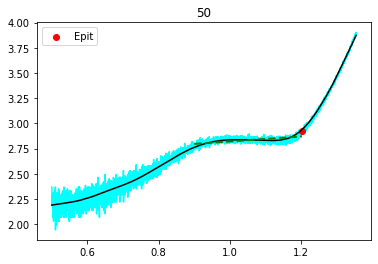

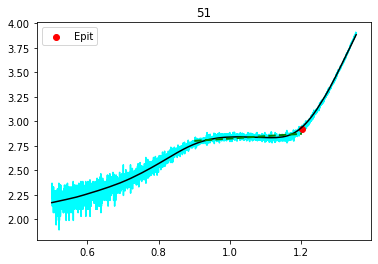

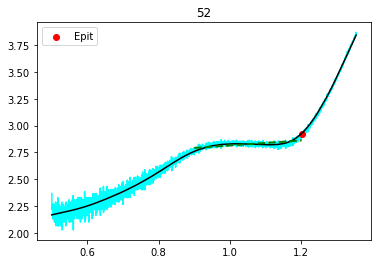

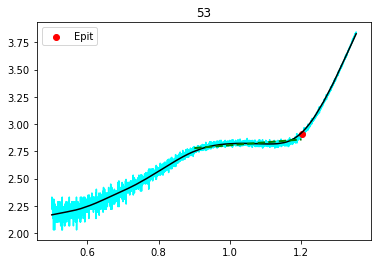

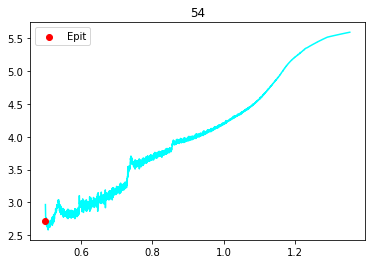

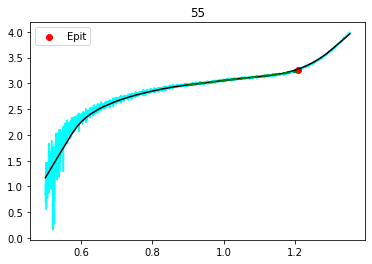

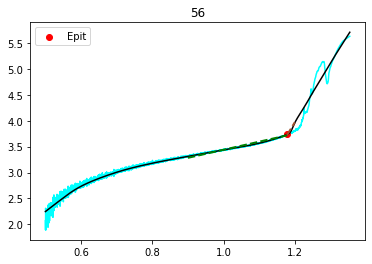

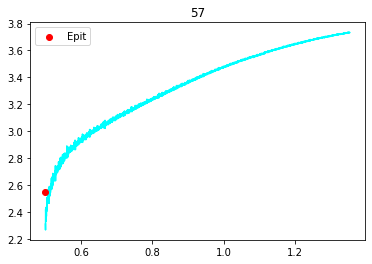

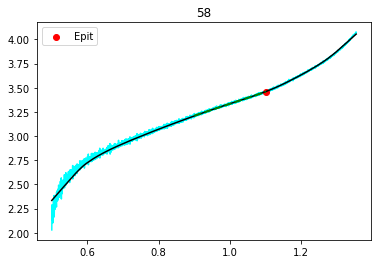

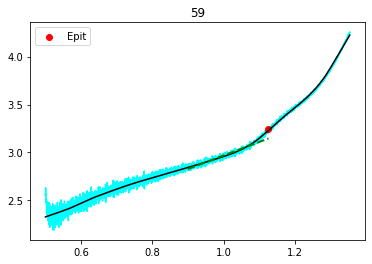

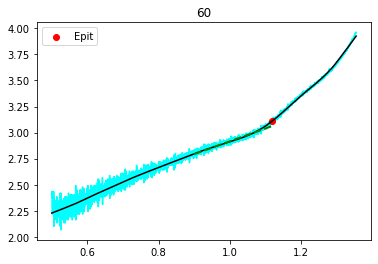

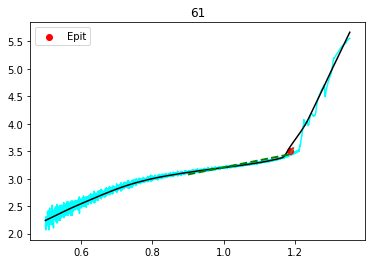

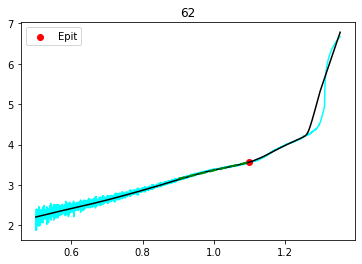

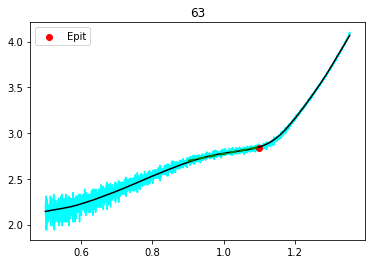

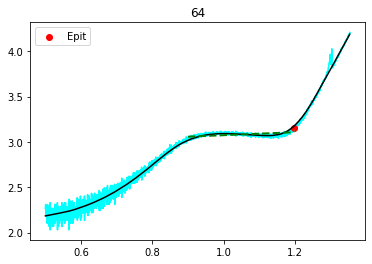

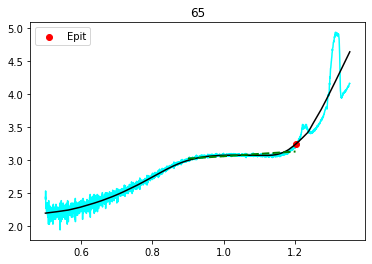

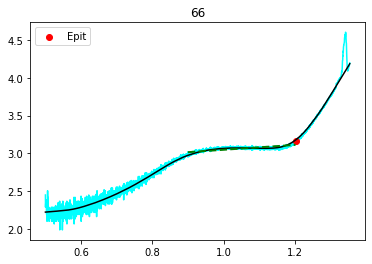

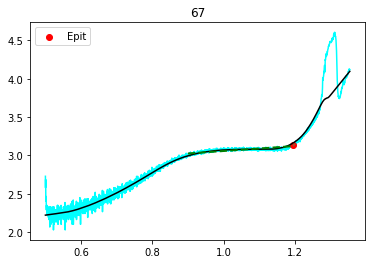

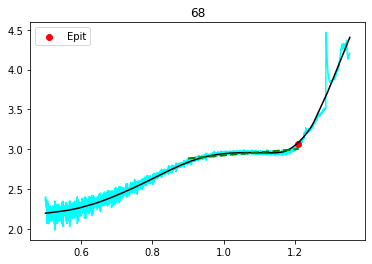

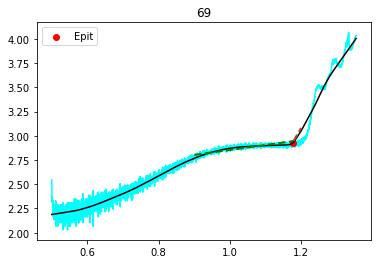

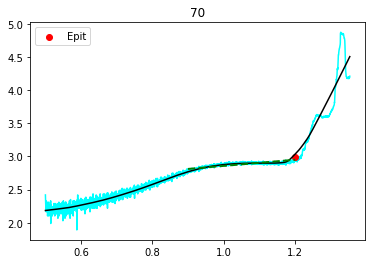

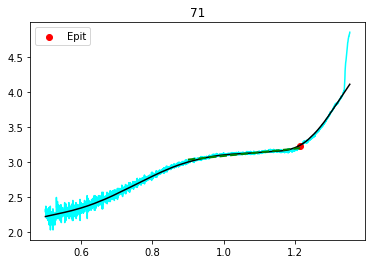

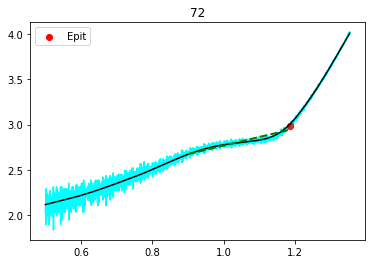

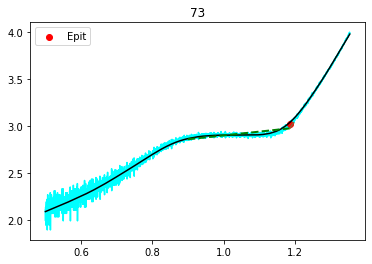

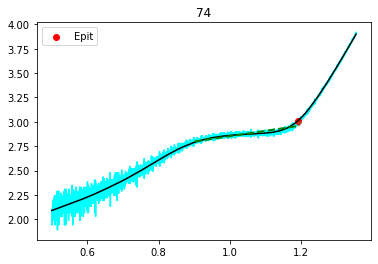

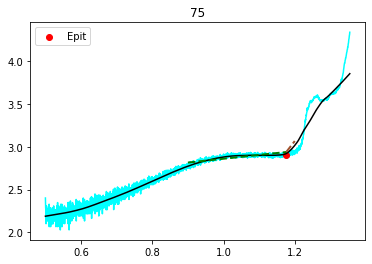

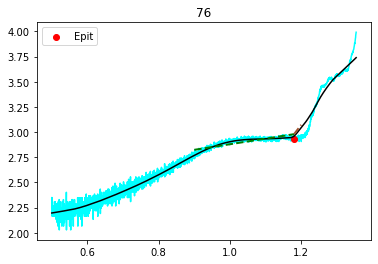

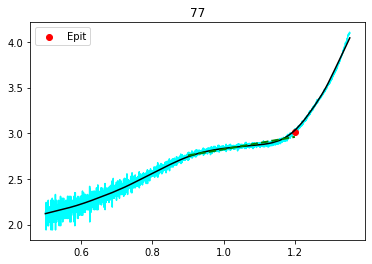

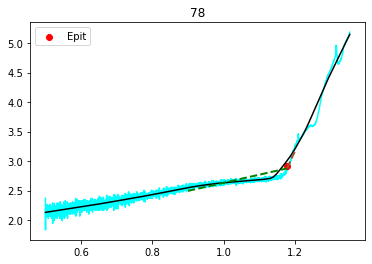

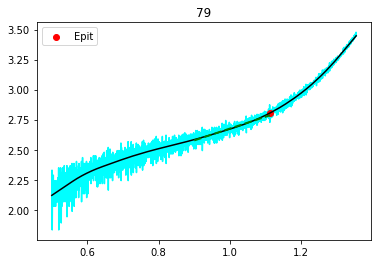

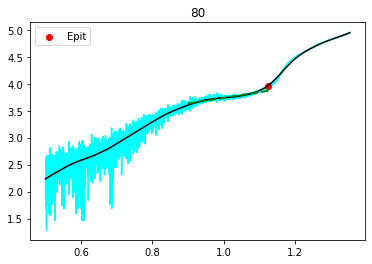

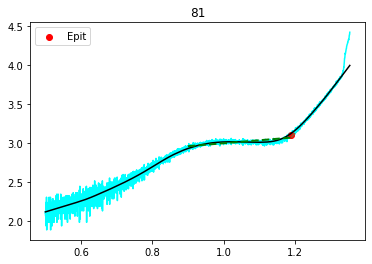

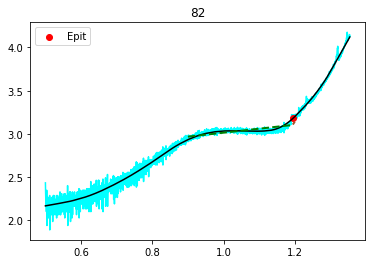

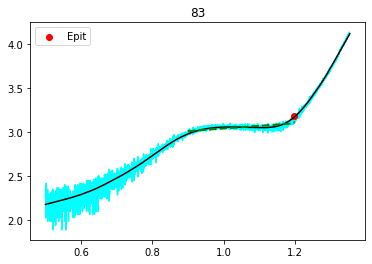

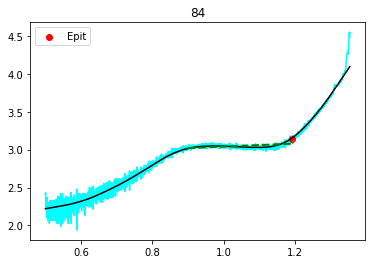

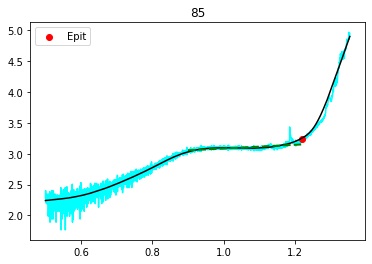

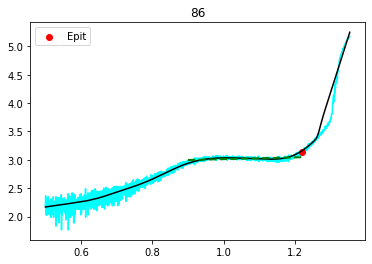

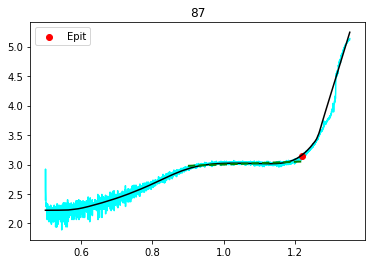

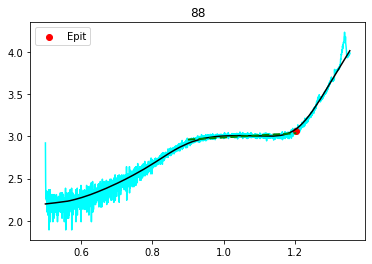

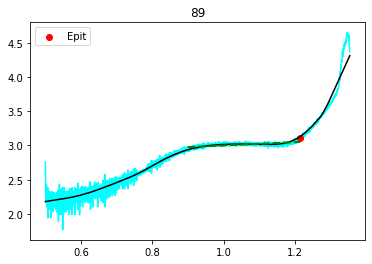

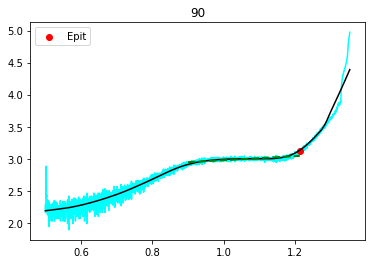

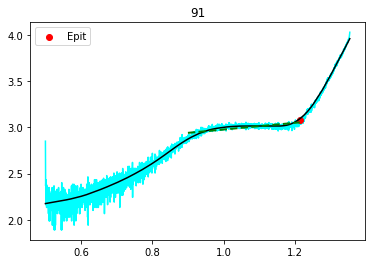

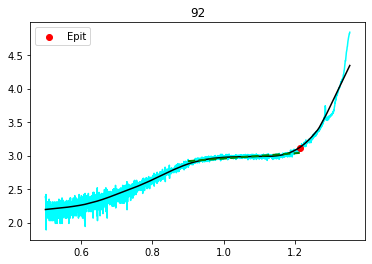

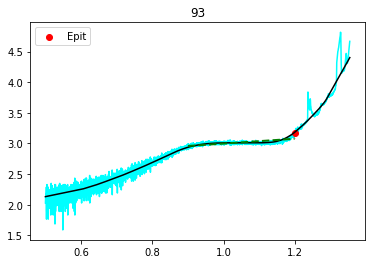

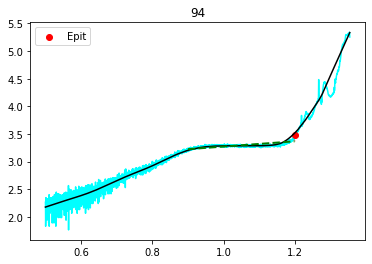

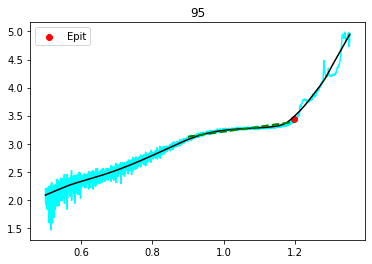

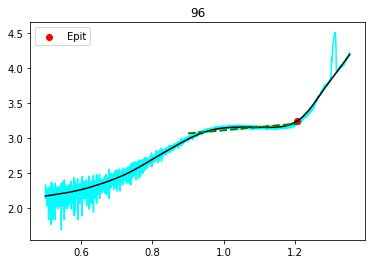

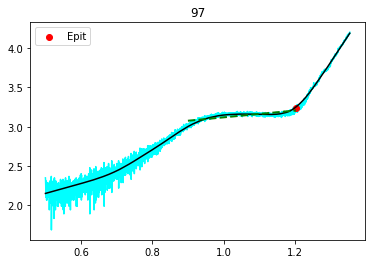

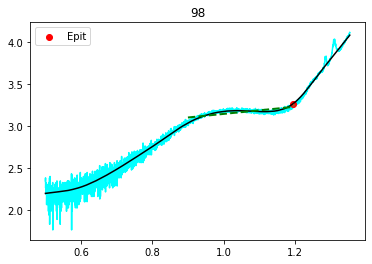

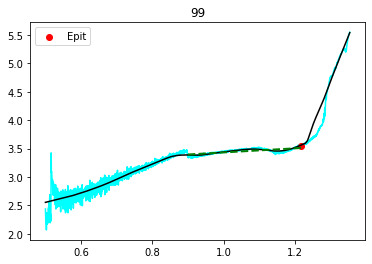

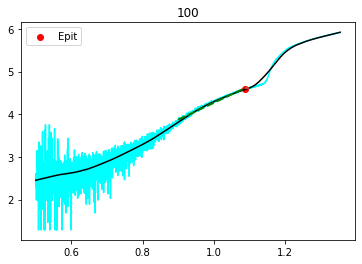

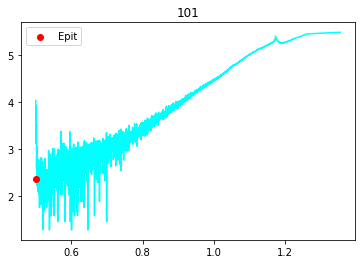

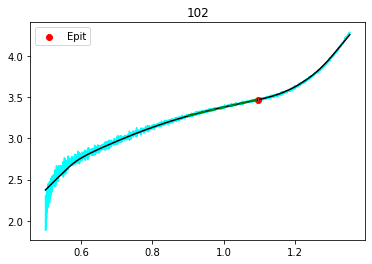

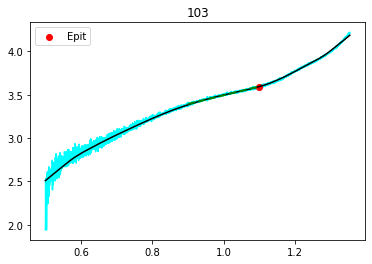

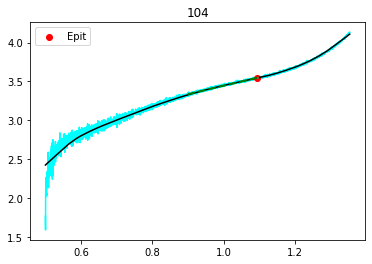

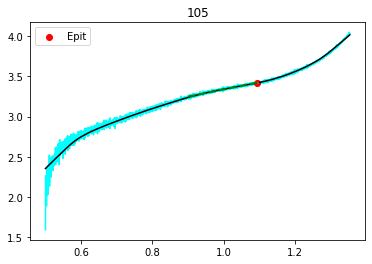

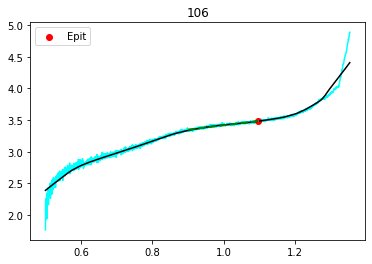

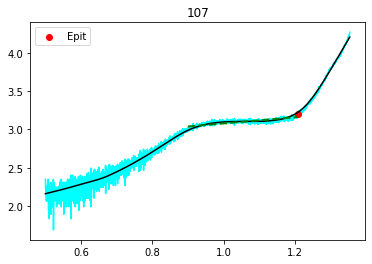

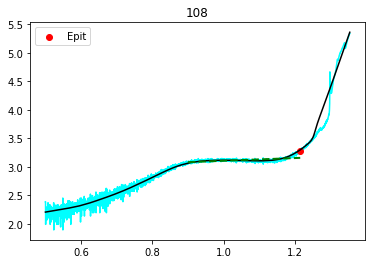

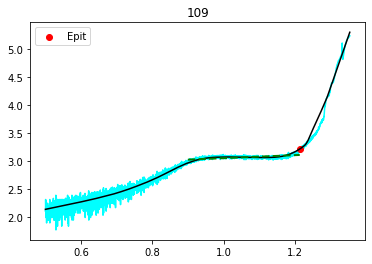

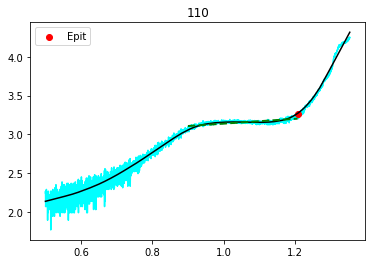

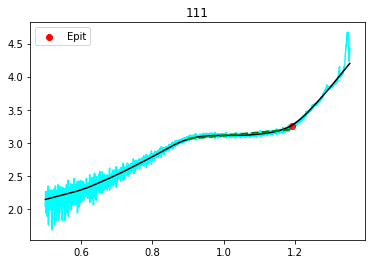

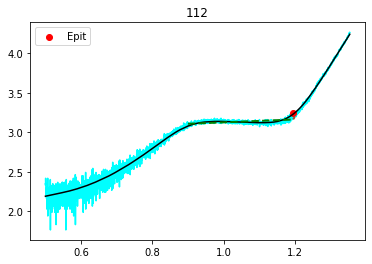

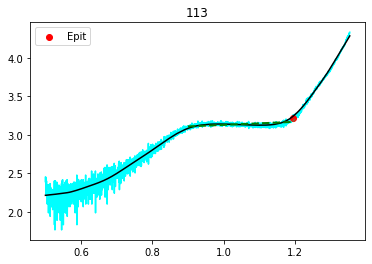

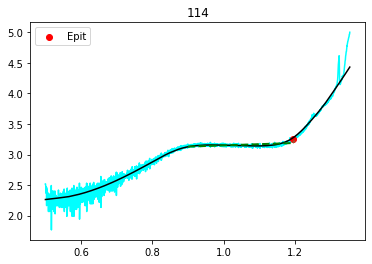

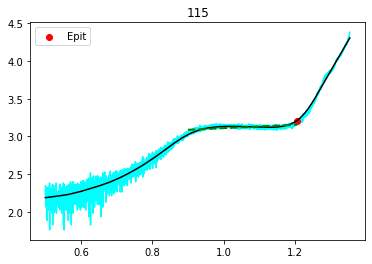

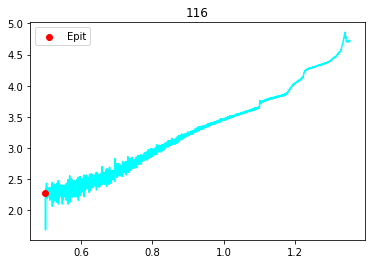

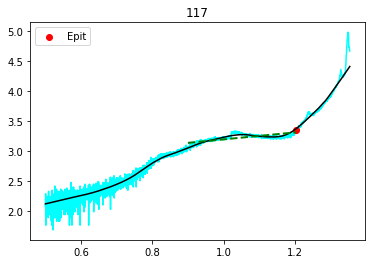

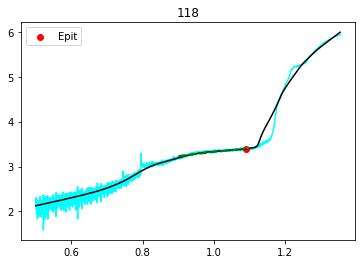

In [39]:
# for avoiding Warnings
plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings('ignore')

column_names =  df_ylow_log.columns

#collect all of the slopes and intercepts for the two parts
Epit_E, Epit_j = [],[]

#initialise the two models for part 1 and part 2
model1 = LinearRegression()
model2 = LinearRegression()

for index, column in enumerate(column_names):
    fig, ax = plt.subplots() 
    
    ax.plot(E , df_log[column], color = "cyan",zorder=1)
    ax.set_title(column)

    # Initialize the r2 values
    r2_final1, r2_final2 = 0, 0
    
    if column not in no_passive_class:
        
        ax.plot(E , df_ylow_log[column], color = "black",zorder=2)
        
        if column in class1+class3: 
            #State which end values for the first part and begin values for the second part should be checked to find the best linear regression
            limits_pit = range(interval_lower_i2,interval_upper_i2+1,1) # row indexes
            pass
        else: 
            limits_pit = range(interval_lower_i,interval_upper_i+1,1) # row indexes
            pass                   

        for limit in limits_pit:
            
        #split the data into the first part and second part
            dfE_1 =  E.iloc[Epass_estimated_i:limit+1]
            dfj_1 =  df_ylow_log.iloc[Epass_estimated_i:limit+1] 
            if column in class1+class3:
                dfE_2 =  E.iloc[limit:limits_pit[-1]+1]
                dfj_2 =  df_ylow_log.iloc[limit:limits_pit[-1]+1]
                pass
            else:
                dfE_2 =  E.iloc[limit:]
                dfj_2 =  df_ylow_log.iloc[limit:]
                pass

            X1,X2 = dfE_1.values.reshape(-1, 1),dfE_2.values.reshape(-1, 1)
            y1,y2 = dfj_1[column].values.reshape(-1, 1),dfj_2[column].values.reshape(-1, 1)

            # Fit models
            regr1, regr2 = model1.fit(X1, y1), model2.fit(X2, y2)
    
            # Evaluate models
            r2_score1, r2_score2 = r2_score(y1, regr1.predict(X1)), r2_score(y2, regr2.predict(X2))

            # Store best models
            if r2_score1 > r2_final1:
                r2_final1, regr_final1 = r2_score1, regr1
            if r2_score2 > r2_final2:
                r2_final2, regr_final2 = r2_score2, regr2

        # Determine intersection
        a1, a2 = regr_final1.coef_[0], regr_final2.coef_[0]
        b1, b2 = regr_final1.intercept_, regr_final2.intercept_

        x_intersect = np.around((b1-b2)/(a2-a1),3) # x value
        E_tempo=E.round(3)
        try:
            xi=E_tempo[E_tempo<=x_intersect.item()].index[-1]
        except:
            xi=E_tempo[E_tempo>=x_intersect.item()].index[0]

        try:
            # plot the best-fit lines up to the intersection
            x1_reg,x2_reg  = E.iloc[Epass_estimated_i:xi+1],E.iloc[xi:limits_pit[-1]+1]
            y1_reg,y2_reg  = x1_reg * a1 + b1,x2_reg * a2 + b2

            ax.plot(x1_reg, y1_reg, linewidth = 2, color = 'green', linestyle = 'dashed')
            ax.plot(x2_reg, y2_reg, linewidth = 2, color = 'sienna', linestyle = 'dashed')
            ax.scatter(E.iloc[xi],np.mean([df_log[column].iloc[xi],df_ylow_log[column].iloc[xi]]),color="red",label="Epit")
            ax.legend() # Epass_j --> the mean between ylow and df_log

            Epit_E.append(E.iloc[xi])
            Epit_j.append(np.mean([df_log[column].iloc[xi],df_ylow_log[column].iloc[xi]])) # mean ylow log

        except: 
            print(column)
    else: # no_passive_class
        print(str(column)+" no passivity") 
        ax.scatter(E.iloc[0],df_ylow_log[column].iloc[0],color="red",label="Epit")
        ax.legend()
        Epit_E.append(E.iloc[0]) # Epass = E.iloc[0] by default
        Epit_j.append(df_ylow_log[column].iloc[0])

### storing the Epit (x,y) values in a df

In [50]:
pit_log = pd.DataFrame({"Epit_x":Epit_E,"Epit_y":Epit_j})
pit_log.index=df_log.columns
pit_log.index.name="Maps"
pit_log

Epit_x    Epit_y
Maps                    
0     1.254311  3.352895
1     1.216468  2.943084
2     1.198462  2.905658
3     1.195410  2.907549
4     1.202124  2.626941
...        ...       ...
114   1.194495  3.245977
115   1.206397  3.203176
116   0.499893  2.274326
117   1.203345  3.351212
118   1.089206  3.396584

[119 rows x 2 columns]

# Epass estimation by rule-based linear regression

### providing initial guesses for the Epass intervals (for improved accuracy of estimation)

#### optimized combination for the general class
Epass interval=[0.7,1.01]

In [40]:
Epass_interval_lower = float(input(r"Enter a guess value (V) for the lower limit of the Epass interval: ")) #'r' --> a character following a backslash is included in the string without change
Epass_interval_upper = float(input(r"Enter a guess value (V) for the upper limit of the Epass interval: ")) #'r' --> a character following a backslash is included in the string without change
interval_lower_ipass=E[E>Epass_interval_lower].dropna().index[0]
interval_upper_ipass=E[E<Epass_interval_upper].dropna().index[-1]
print("Epass guessed interval: "+str(round(E[interval_upper_ipass]-E[interval_lower_ipass],3))+" V")

Enter a guess value (V) for the lower limit of the Epass interval: 0.7
Enter a guess value (V) for the upper limit of the Epass interval: 1.01
Epass guessed interval: 0.309 V


In [41]:
late_passivity=[0,27,29] # Epass>1

#### optimized combination for late_passivity
Epass interval=[0.7,1.1]

In [42]:
Epass_interval_lower3 = float(input(r"Enter a guess value (V) for the lower limit of the Epass interval: ")) #'r' --> a character following a backslash is included in the string without change
Epass_interval_upper3 = float(input(r"Enter a guess value (V) for the upper limit of the Epass interval: ")) #'r' --> a character following a backslash is included in the string without change
interval_lower_ipass3=E[E>Epass_interval_lower3].dropna().index[0]
interval_upper_ipass3=E[E<Epass_interval_upper3].dropna().index[-1]
print("Epass guessed interval: "+str(round(E[interval_upper_ipass3]-E[interval_lower_ipass3],3))+" V")

Enter a guess value (V) for the lower limit of the Epass interval: 0.7
Enter a guess value (V) for the upper limit of the Epass interval: 1.1
Epass guessed interval: 0.399 V


## plotting the Epass (E and log(j) pair values) estimated by linear regression

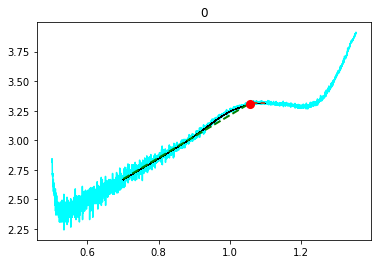

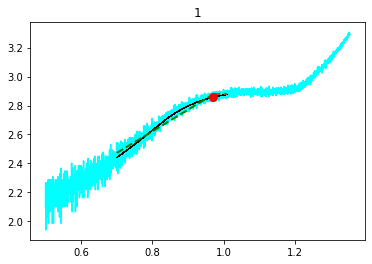

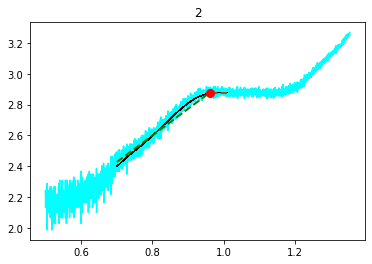

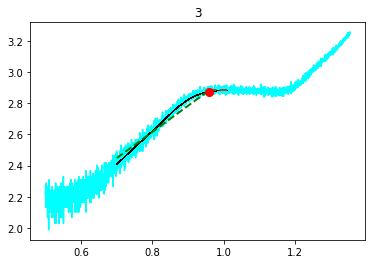

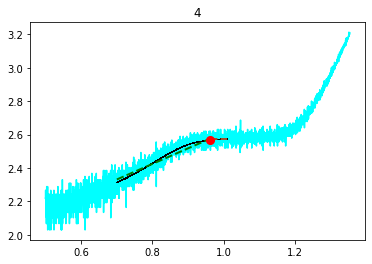

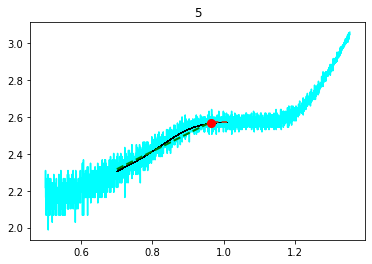

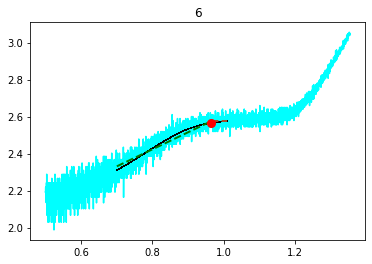

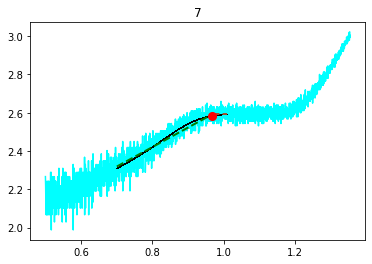

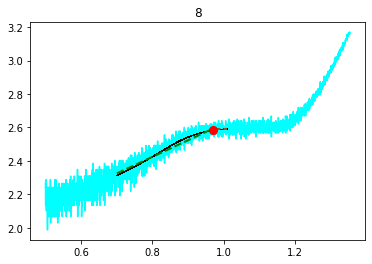

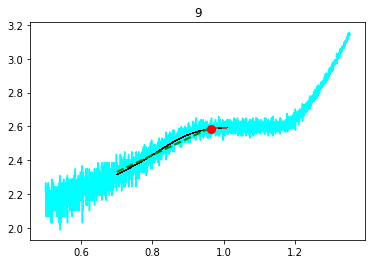

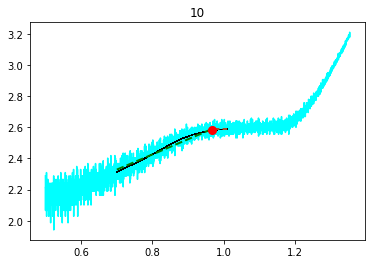

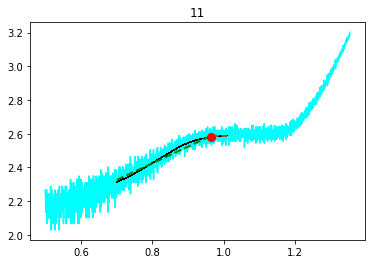

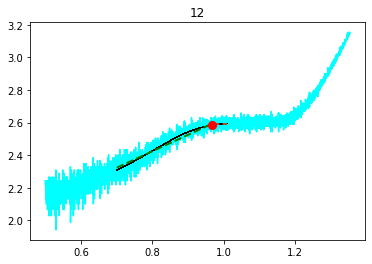

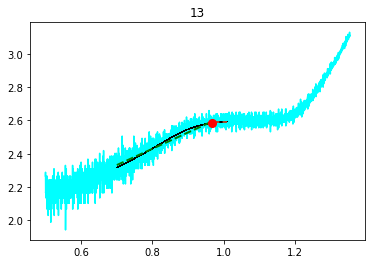

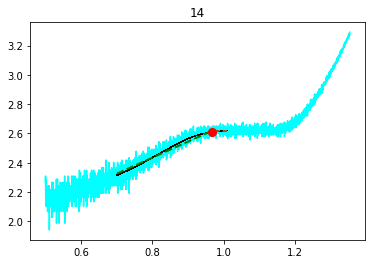

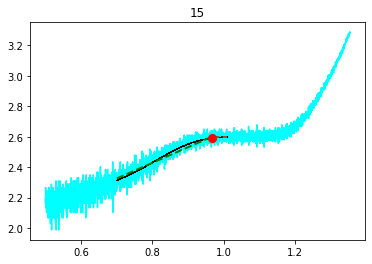

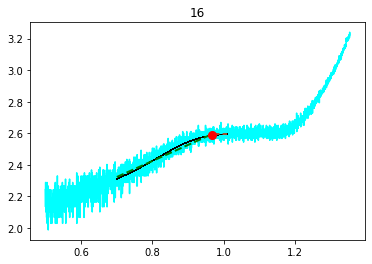

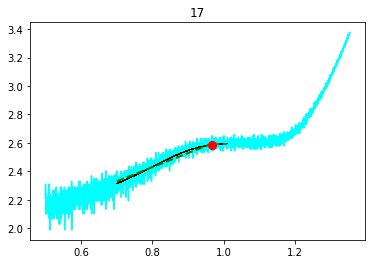

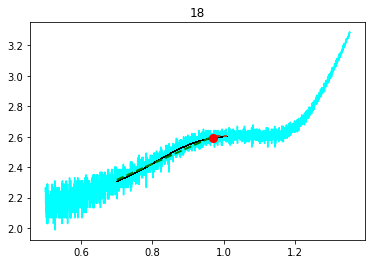

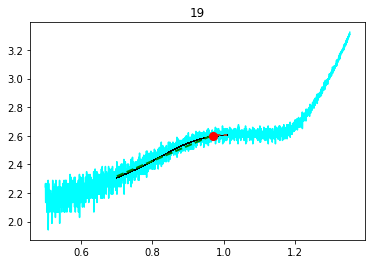

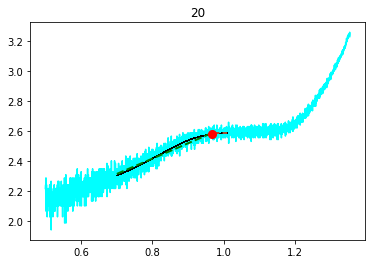

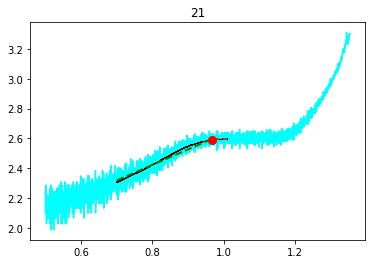

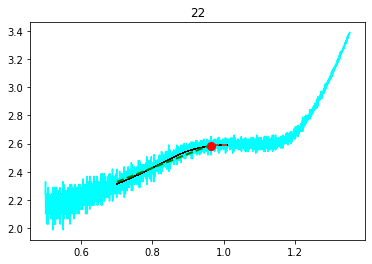

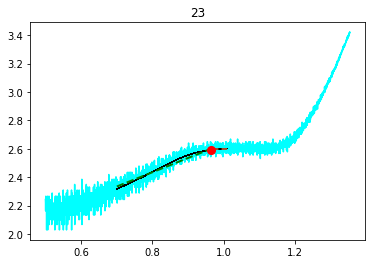

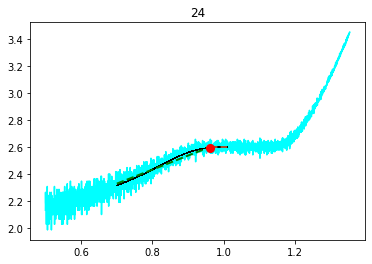

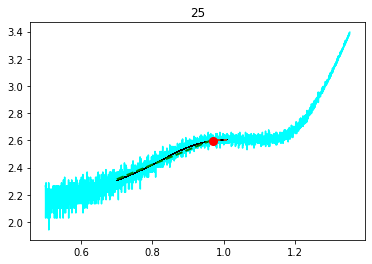

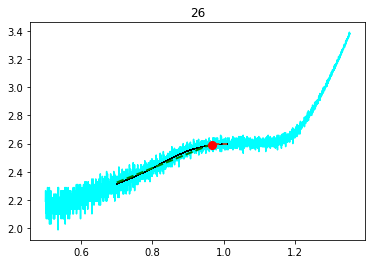

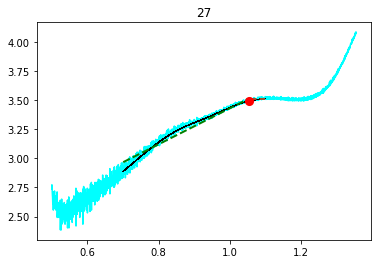

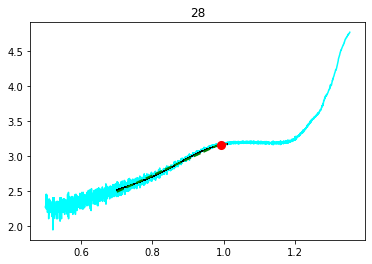

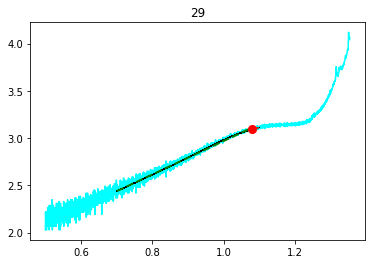

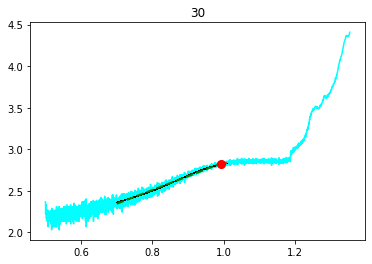

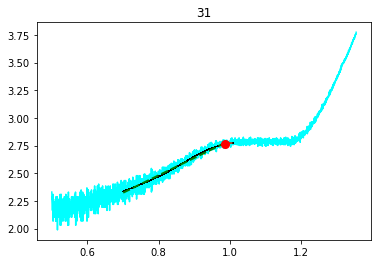

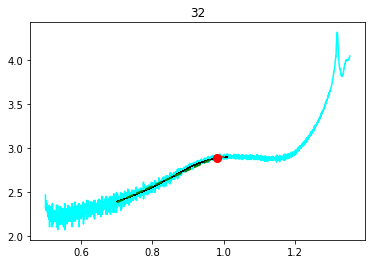

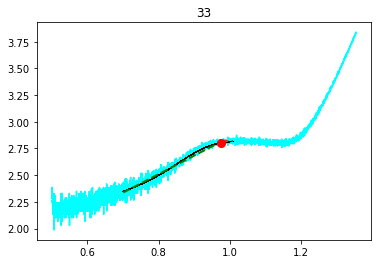

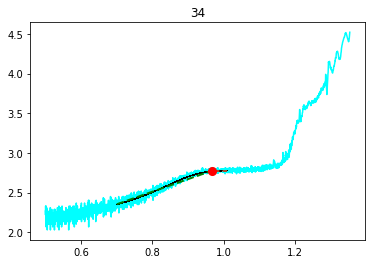

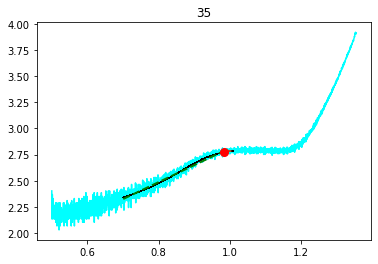

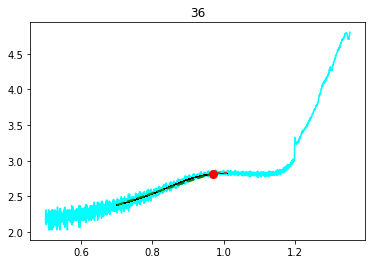

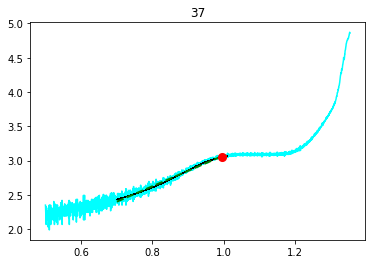

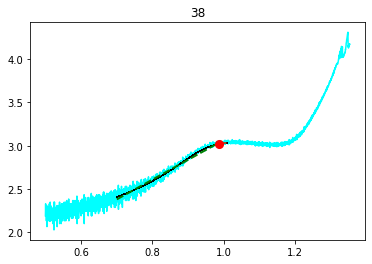

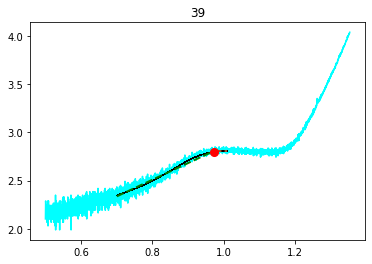

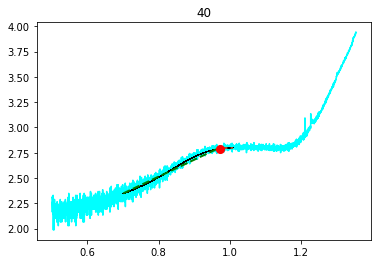

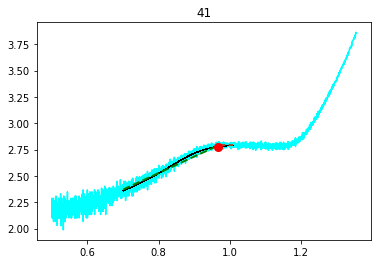

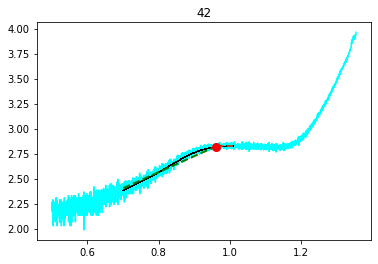

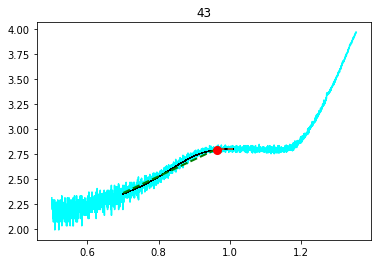

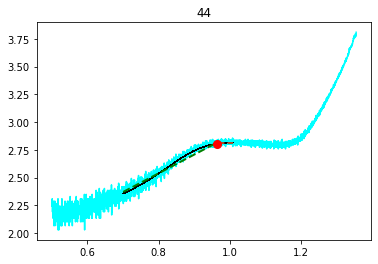

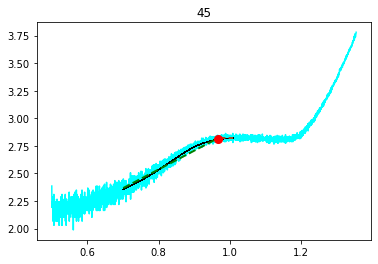

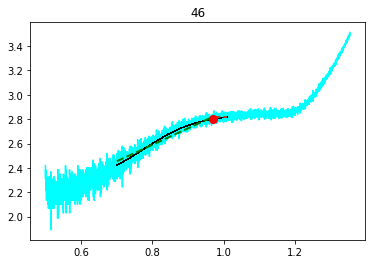

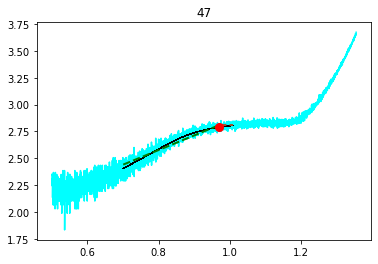

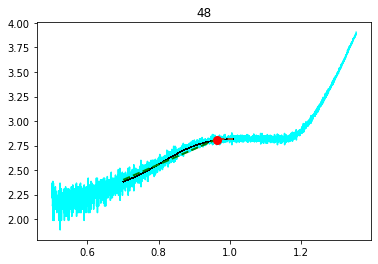

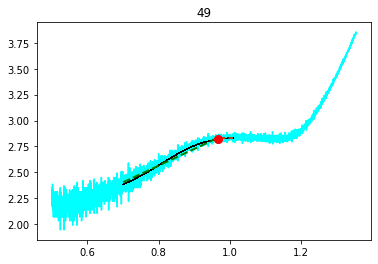

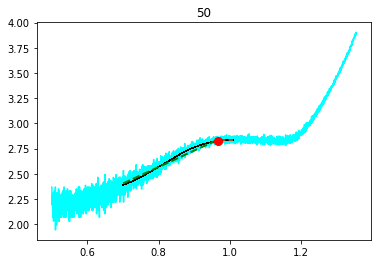

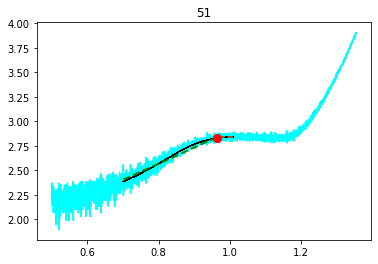

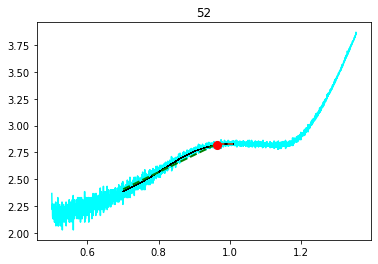

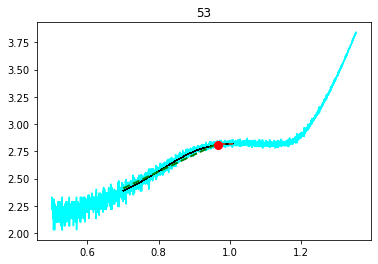

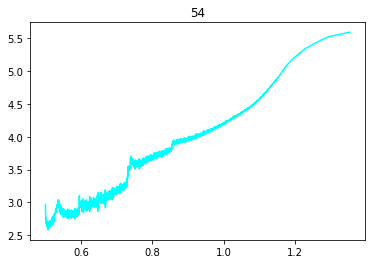

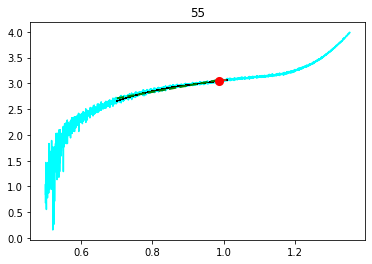

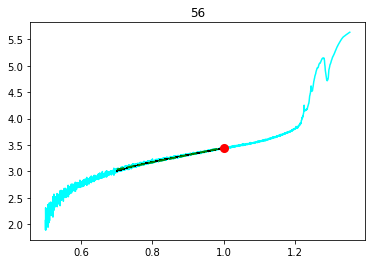

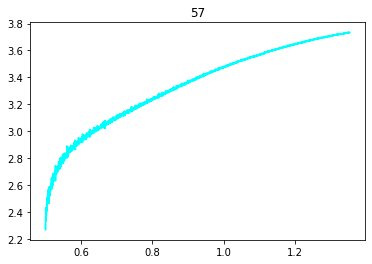

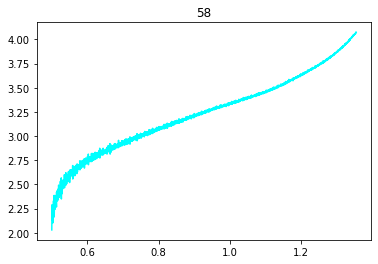

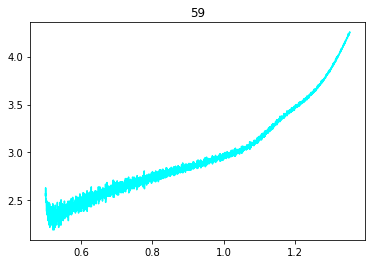

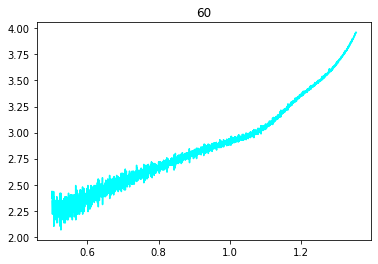

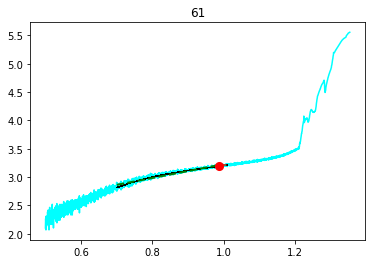

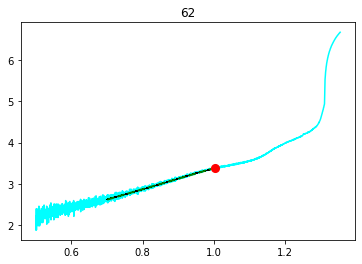

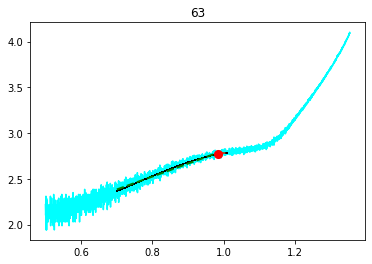

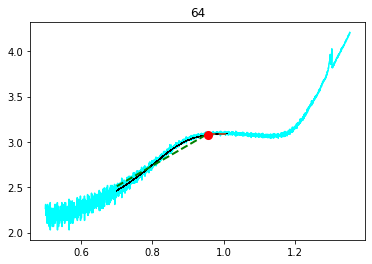

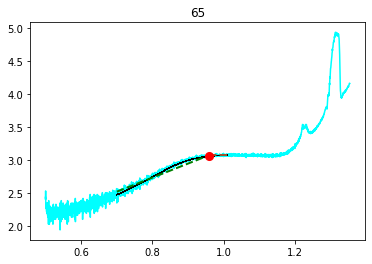

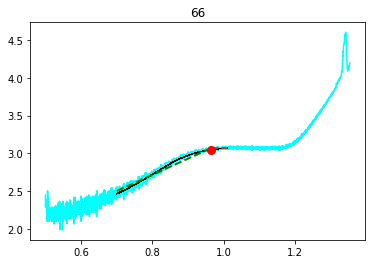

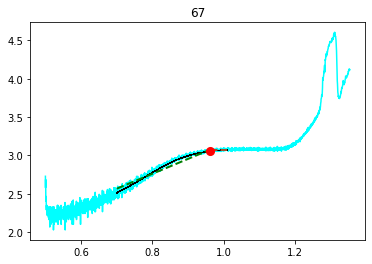

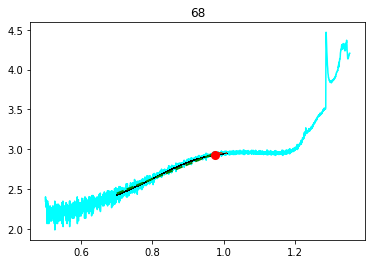

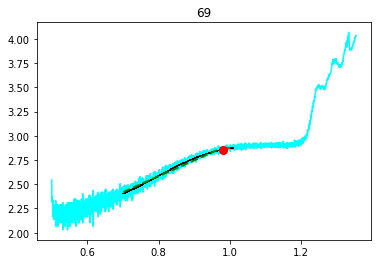

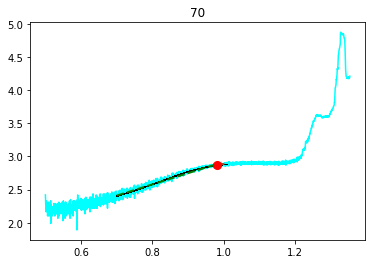

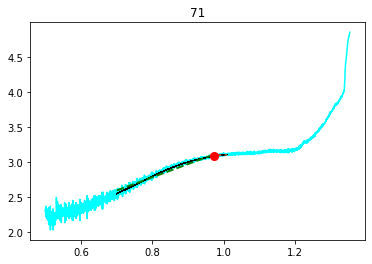

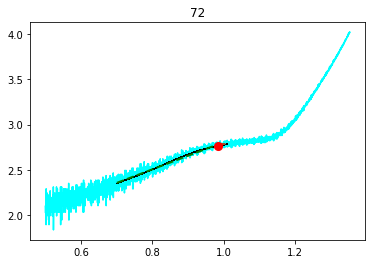

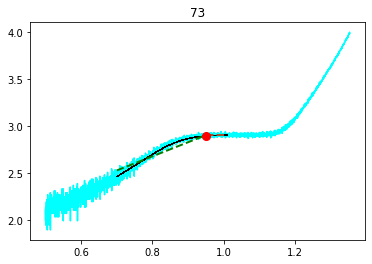

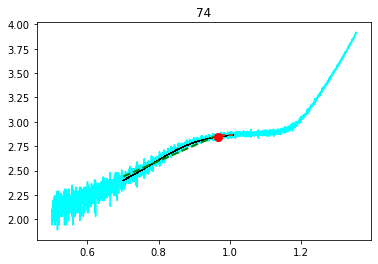

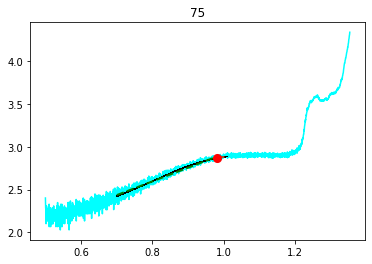

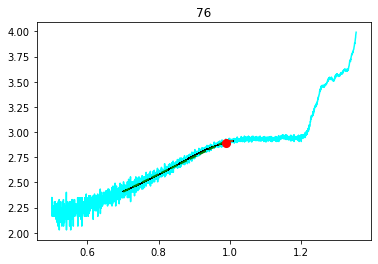

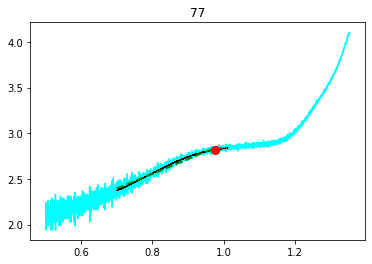

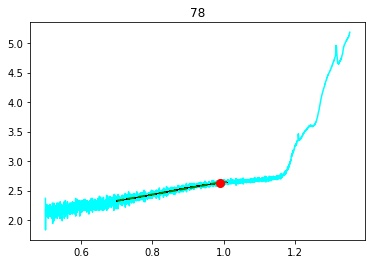

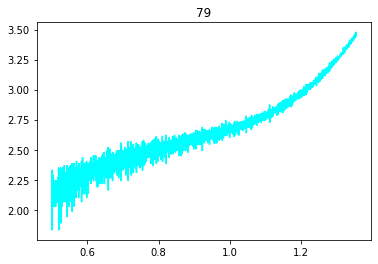

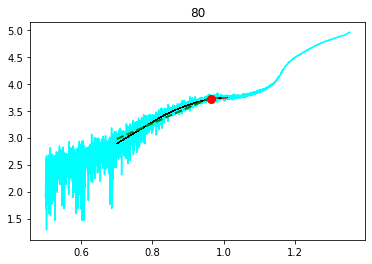

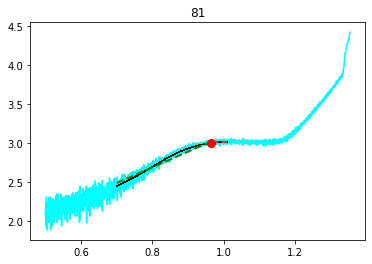

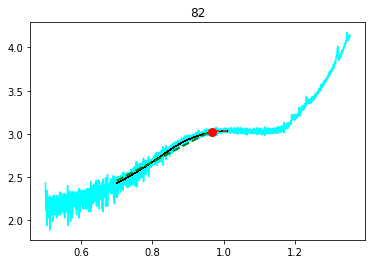

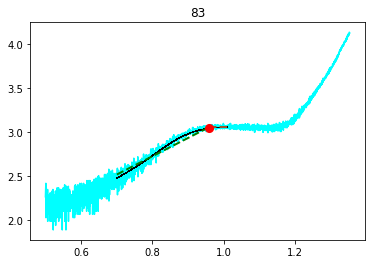

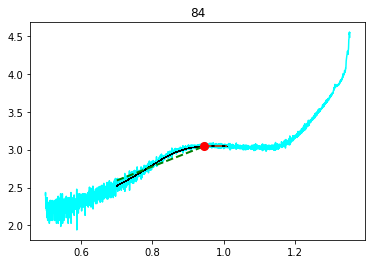

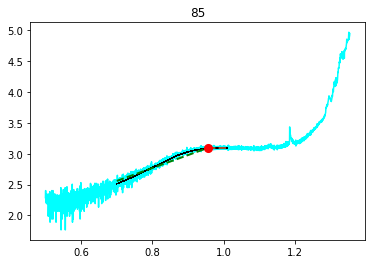

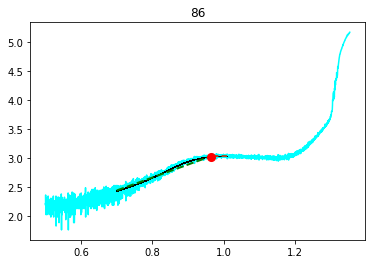

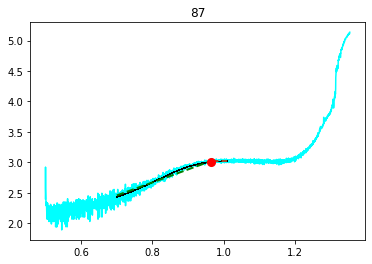

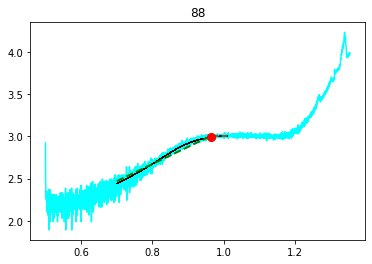

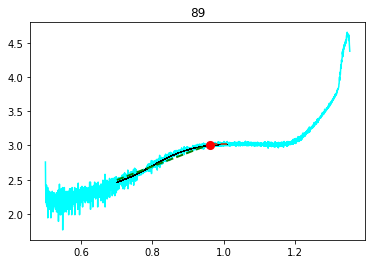

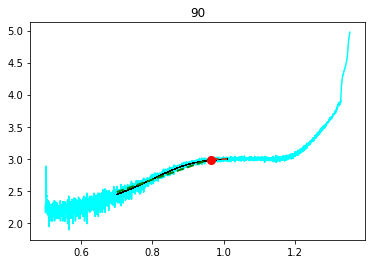

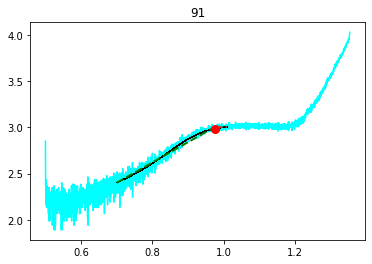

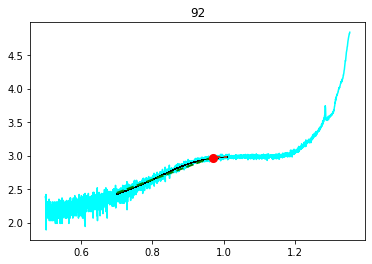

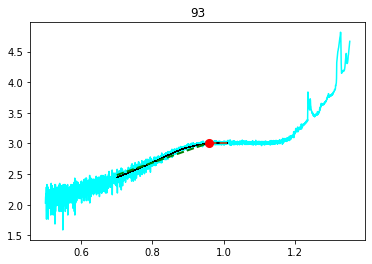

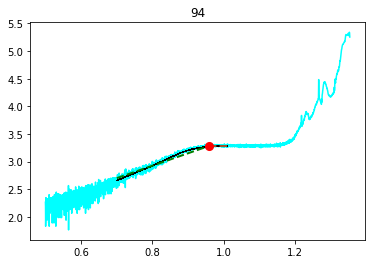

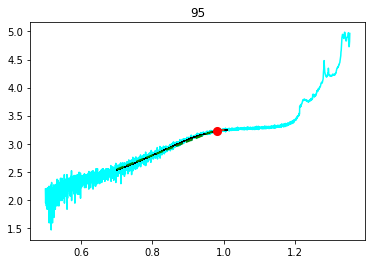

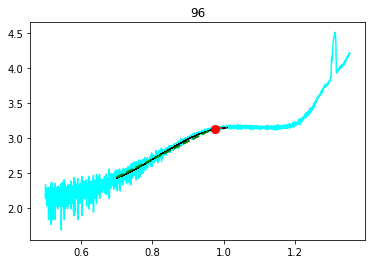

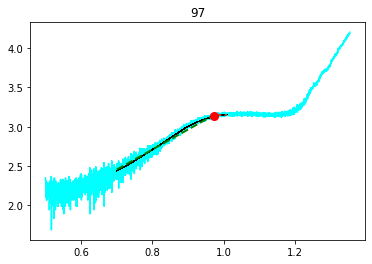

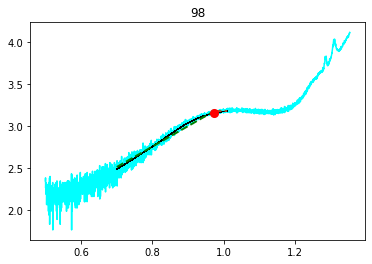

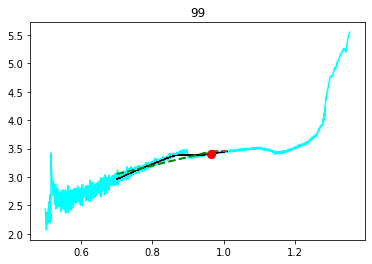

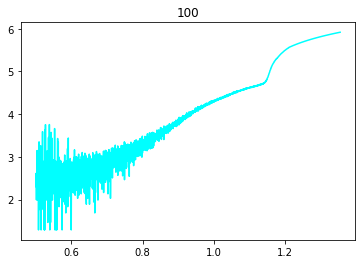

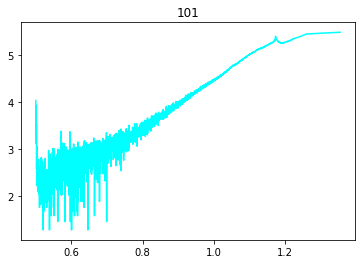

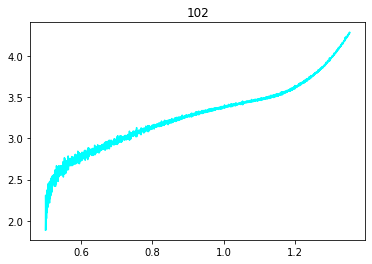

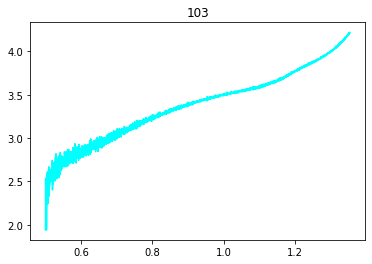

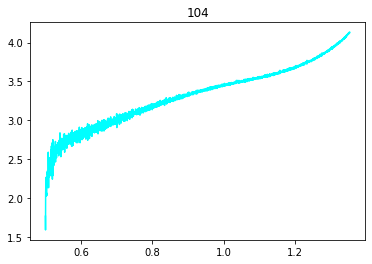

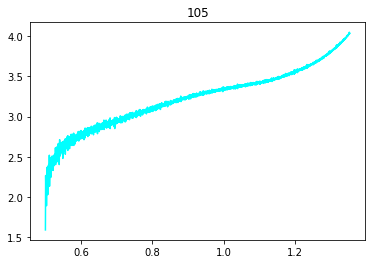

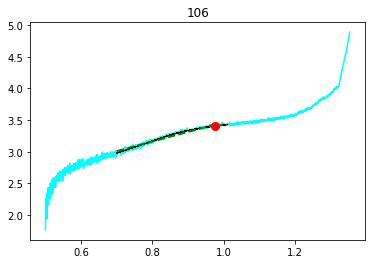

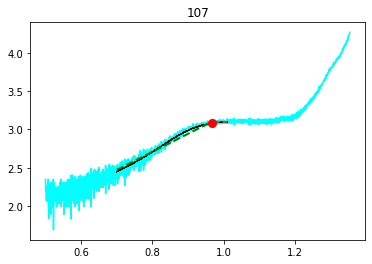

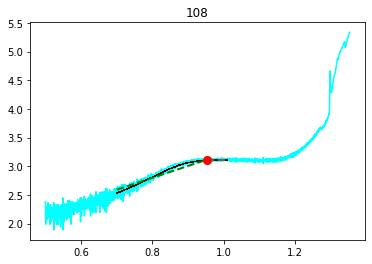

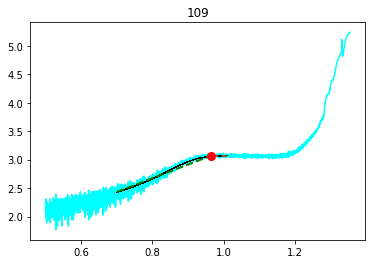

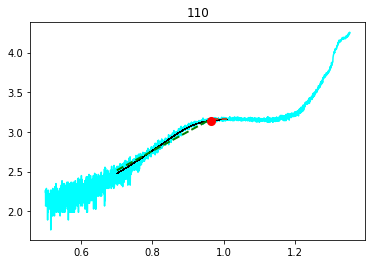

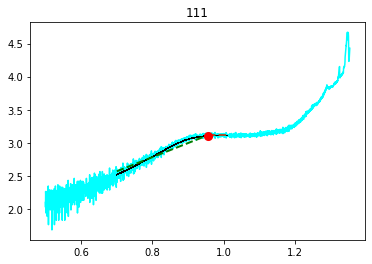

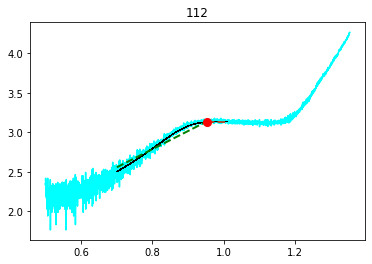

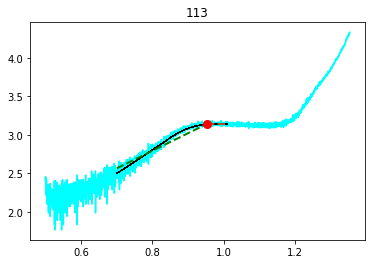

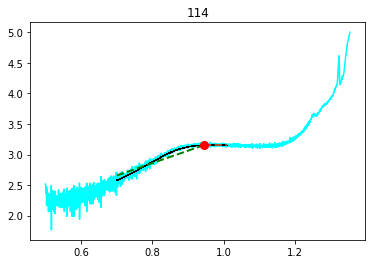

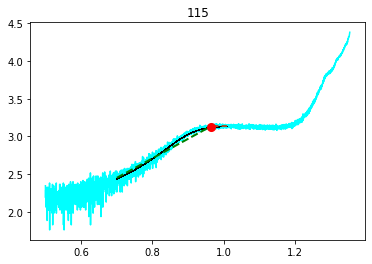

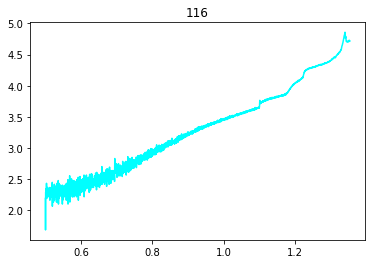

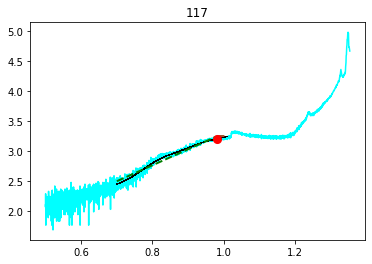

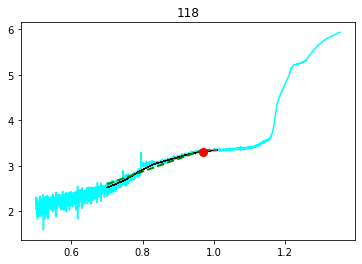

In [47]:
# for avoiding Warnings
plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings('ignore')

column_names =  df_ylow_log.columns

#collect all of the slopes and intercepts for the two parts
Epass_E, Epass_j = [],[]

#initialise the two models for part 1 and part 2
model1 = LinearRegression()
model2 = LinearRegression()

for (index, column) in enumerate(column_names):
    fig, ax = plt.subplots() 
    
    ax.plot(E , df_log[column], color = "cyan",zorder=1)

    ax.set_title(column)

    # Initialize the r2 values
    r2_final1, r2_final2 = 0, 0
    
    if column not in no_passive_class+list(set(class3)-set(class3_Epass)): # no_passive_class --> no Epass
        
        if column in late_passivity:
            limits_pass = range(interval_lower_ipass3,interval_upper_ipass3+1,1)
        else:
            limits_pass = range(interval_lower_ipass,interval_upper_ipass+1,1)                
        
        for limit in limits_pass:

            ax.plot(E.iloc[limits_pass[0]:limits_pass[-1]+1],df_ylow_log[column].iloc[limits_pass[0]:limits_pass[-1]+1], color = "black",linewidth=0.5,zorder=2) # ylow

             #split the data into the first part and second part
            dfE_1 =  E.iloc[limits_pass[0]:limit+1]
            dfE_2 =  E.iloc[limit:limits_pass[-1]+1] 
            dfj_1 =  df_ylow_log.iloc[limits_pass[0]:limit+1] 
            dfj_2 =  df_ylow_log.iloc[limit:limits_pass[-1]+1] 
            X1,X2 = dfE_1.values.reshape(-1, 1),dfE_2.values.reshape(-1, 1)
            y1,y2 = dfj_1[column].values.reshape(-1, 1),dfj_2[column].values.reshape(-1, 1)

            # Fit models
            regr1, regr2 = model1.fit(X1, y1), model2.fit(X2, y2)
    
            # Evaluate models
            r2_score1, r2_score2 = r2_score(y1, regr1.predict(X1)), r2_score(y2, regr2.predict(X2))

            # Store best models
            if r2_score1 > r2_final1:
                r2_final1, regr_final1 = r2_score1, regr1
            if r2_score2 > r2_final2:
                r2_final2, regr_final2 = r2_score2, regr2

        # Determine intersection
        a1, a2 = regr_final1.coef_[0], regr_final2.coef_[0]
        b1, b2 = regr_final1.intercept_, regr_final2.intercept_

        x_intersect = np.around((b1-b2)/(a2-a1),3) # x value
        E_tempo=E.round(3)
        try:
            xi=E_tempo[E_tempo<=x_intersect.item()].index[-1]
        except:
            xi=E_tempo[E_tempo>=x_intersect.item()].index[0]

        try:
            # plot the best-fit lines up to the intersection
            x1_reg,x2_reg  = E.iloc[limits_pass[0]:xi+1],E.iloc[xi:limits_pass[-1]+1]
            y1_reg,y2_reg  = x1_reg * a1 + b1,x2_reg * a2 + b2      

            ax.plot(x1_reg, y1_reg, linewidth = 2, color = 'green', linestyle = 'dashed')
            ax.plot(x2_reg, y2_reg, linewidth = 2, color = 'sienna', linestyle = 'dashed')
            ax.scatter(E.iloc[xi], df_ylow_log[column].iloc[xi], marker='.',s=200, c='r',linewidths=2,zorder=3) 
            Epass_E.append(E.iloc[xi])
            Epass_j.append(df_ylow_log[column].iloc[xi])      
        except:
            print(column)
    else: # no_passive_class + class3 (Epass=nan) --> np.nan
        Epass_E.append(np.nan) 
        Epass_j.append(np.nan)

### storing the Epass (x,y) values in a df

In [48]:
pass_log = pd.DataFrame({"Epass_x":Epass_E,"Epass_y":Epass_j})
pass_log.index=df_ylow_log.columns
pass_log.index.name="Maps"
pass_log

Epass_x   Epass_y
Maps                    
0     1.056246  3.302287
1     0.971404  2.857786
2     0.961333  2.872688
3     0.959197  2.874052
4     0.961333  2.566394
...        ...       ...
114   0.944243  3.154256
115   0.964385  3.119481
116        NaN       NaN
117   0.981170  3.203697
118   0.968352  3.311691

[119 rows x 2 columns]

### storing the Epit (x,y) and Epass (x,y) values in a df (and exporting it as a CSV file)

In [51]:
# choosing the directory 
os.chdir(r"C:\Users\lbertolu\OneDrive - Vrije Universiteit Brussel\ULB\SECCM tests\pitting statistics paper draft\pape2")

pit_pass_log=pd.concat([pit_log,pass_log],axis=1)
pit_pass_log.to_csv('Epit_Epass_001_50.csv', index=True)
pit_pass_log

Epit_x    Epit_y   Epass_x   Epass_y
Maps                                        
0     1.254311  3.352895  1.056246  3.302287
1     1.216468  2.943084  0.971404  2.857786
2     1.198462  2.905658  0.961333  2.872688
3     1.195410  2.907549  0.959197  2.874052
4     1.202124  2.626941  0.961333  2.566394
...        ...       ...       ...       ...
114   1.194495  3.245977  0.944243  3.154256
115   1.206397  3.203176  0.964385  3.119481
116   0.499893  2.274326       NaN       NaN
117   1.203345  3.351212  0.981170  3.203697
118   1.089206  3.396584  0.968352  3.311691

[119 rows x 4 columns]

#### dataset exported above is permanently stored at: https://data.mendeley.com/datasets/5x4dmc38bg/1
Bertolucci Coelho, Leonardo; Ustarroz, Jon (2023), “Epit and Epass descriptors of 316L stainless steel estimated by Machine Learning”, Mendeley Data, V1, doi: 10.17632/5x4dmc38bg.1

# Statistical analysis

#### importing theoretical fitting distributions

In [14]:
!pip install distfit


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from distfit import distfit
from scipy.stats import norm

#### computing the mean and median values of the Epit_y and Epass_y (log(j)) distributions for plotting histograms

In [39]:
Epass_y_mean=np.mean(pit_pass_log['Epass_y'])
Epass_y_median=np.nanpercentile(pit_pass_log['Epass_y'],50)

Epit_y_mean05=np.mean(pit_pass_log['Epit_y'][round(pit_pass_log['Epit_x'],2)!=0.5]) # excluding values when Epass = 0.5 V 
Epit_y_median05=np.nanpercentile(pit_pass_log['Epit_y'][round(pit_pass_log['Epit_x'],2)!=0.5],50) # excluding values when Epass = 0.5 V 

#### Kernel Density Estimation (KDE) of the bivariate distributions of Epit/log(jpit) and  Epass/log(jpass)

https://stackoverflow.com/questions/31198020/how-to-find-local-maxima-in-kernel-density-estimation

In [15]:
def estimate_maxima(data):
    data.dropna(inplace=True)
    k = kde.gaussian_kde(data)
    no_samples = len(data)
    samples = np.linspace(data.min(), data.max(), no_samples)
    probs = k.evaluate(samples)
    maxima_index = probs.argmax()
    maxima = samples[maxima_index]
    return maxima

In [19]:
Epit_x_kde,Epit_y_kde=estimate_maxima(pit_pass_log["Epit_x"]),estimate_maxima(pit_pass_log["Epit_y"])
Epass_x_kde,Epass_y_kde=estimate_maxima(pit_pass_log["Epass_x"]),estimate_maxima(pit_pass_log["Epass_y"])

### plotting histograms of Epit_x and Epass_x (Epit and Epass (V))

In [51]:
# excluding outliers for curve fitting purpose
Epit=pit_pass_log['Epit_x'][round(pit_pass_log['Epit_x'],2)!=0.5]
Epass=pit_pass_log['Epass_x'] 

Epit_sort=np.sort(Epit)
Epass_sort=np.sort(Epass.dropna()) # should not have nan # excluding values when Epass = 0.5 V 

def Zscore_outliers(data):
    outliers =[]
    threshold=3 # 3 x std
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

Zscore_outliers_list_Epit=Zscore_outliers(Epit_sort)
Zscore_outliers_list_Epass=Zscore_outliers(Epass_sort)

maskpit = Epit.isin(Zscore_outliers_list_Epit)
maskpass = Epass.isin(Zscore_outliers_list_Epass)

not_in_list_maskpit = ~maskpit
not_in_list_maskpass = ~maskpass
df_not_in_listpit = Epit.loc[not_in_list_maskpit]
df_not_in_listpass = Epass.loc[not_in_list_maskpass]

norm RSS: 2060.328059562992
norm RSS: 166.271360120145


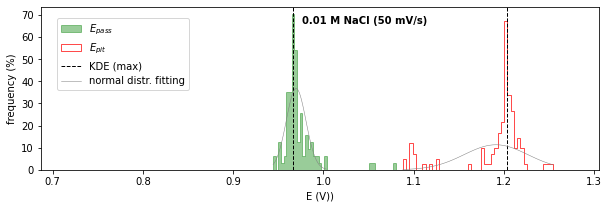

In [52]:
unique_pass=np.unique(pit_pass_log['Epass_x']) 
unique_pit=np.unique(pit_pass_log['Epit_x'][round(pit_pass_log['Epit_x'],2)!=0.5])
bins_pass=len(unique_pass)
bins_pit=len(unique_pit)

fig, ax = plt.subplots(figsize=(10,3))

ax.hist(pit_pass_log['Epass_x'],density=True,bins=bins_pass,color="green",fill=True,histtype='step',alpha=0.4,label="$E_{pass}$")

ax.hist(pit_pass_log['Epit_x'][round(pit_pass_log['Epit_x'],2)!=0.5], density=True,bins=bins_pit,color="red",fill=False,histtype='step',linewidth=0.7,label="$E_{pit}$")

ax.axvline(x = Epass_x_kde,color = 'k',linestyle = 'dashed',linewidth = 1,zorder=2,label="KDE (max)")
ax.axvline(x = Epit_x_kde,color = 'k',linestyle = 'dashed',linewidth = 1,zorder=2)

ax.set_xlabel("E (V))")
ax.set_ylabel("frequency (%)")
ax.set_xlim(0.687,1.305)
ax.set_title("0.01 M NaCl (50 mV/s)",fontsize = 10, y=0.86,x=0.58,weight='bold') 

#without outliers
Epass_sortwo=np.sort(df_not_in_listpass.dropna())
xpass=np.linspace(Epass_sortwo[0],Epass_sortwo[-1],len(unique_pass)) 
dist = distfit(distr="norm",smooth=20,bins=round(len(unique_pass)/2)) 
dist.fit_transform(Epass_sortwo, verbose=1)  
print(dist.model['name']+" RSS: "+str(dist.model['score'])) 
model=norm.pdf(xpass, dist.model['params'][0],dist.model['params'][1])
ax.plot(xpass,model,"grey",linewidth=0.5,label="normal distr. fitting")

Epit_sortwo=np.sort(df_not_in_listpit.dropna())
xpit=np.linspace(Epit_sortwo[0],Epit_sortwo[-1],len(unique_pit)) 
dist = distfit(distr="norm",smooth=20,bins=round(len(unique_pit)/2)) 
dist.fit_transform(Epit_sortwo, verbose=1)  
print(dist.model['name']+" RSS: "+str(dist.model['score'])) 
model=norm.pdf(xpit, dist.model['params'][0],dist.model['params'][1])
ax.plot(xpit,model,"grey",linewidth=0.5)

fig.legend(loc="upper left", bbox_to_anchor=(0.14, 0.85))

### plotting histograms of Epit_y and Epass_y (log(jpit) and log(jpass) (µA/cm²))

Text(0.55, 0.96, '0.01 M NaCl (50 mV/s)')

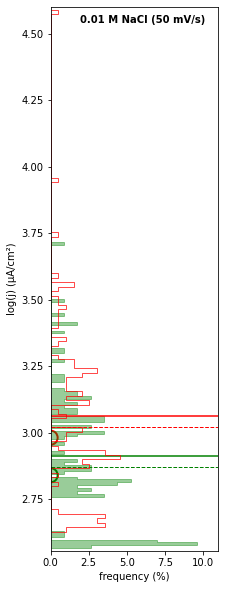

In [54]:
unique_pass=np.unique(pit_pass_log['Epass_y']) 
unique_pit=np.unique(pit_pass_log['Epit_y'][round(pit_pass_log['Epit_x'],2)!=0.5]) 
bins_pass=len(unique_pass)
bins_pit=len(unique_pit)

fig, ax = plt.subplots(figsize=(3,10))

ax.hist(pit_pass_log['Epass_y'],density=True,bins=bins_pass,color="green",fill=True,histtype='step',alpha=0.4,orientation="horizontal",label="$E_{pass}$")
ax.axhline(y = Epass_y_mean, color = 'green', linewidth = 1.5,zorder=2,label="mean")
ax.axhline(y = Epass_y_median, color = 'green',linestyle = 'dashed',linewidth = 1,zorder=2,label="median")

ax.hist(pit_pass_log['Epit_y'][round(pit_pass_log['Epit_x'],2)!=0.5], density=True,bins=bins_pit,color="red",fill=False,histtype='step',linewidth=0.7,orientation="horizontal",label="$E_{pit}$")
ax.axhline(y = Epit_y_mean05, color = 'red', linewidth = 1.5,zorder=2,label="mean")
ax.axhline(y = Epit_y_median05, color = 'red',linestyle = 'dashed',linewidth = 1,zorder=2,label="median")

ax.scatter(0,Epass_y_kde,marker="o",s=200,facecolors='none',edgecolors="g",linewidth=2)
ax.scatter(0,Epit_y_kde,marker="o",s=200,facecolors='none',edgecolors="r",linewidth=2)

ax.set_ylabel("log(j) (µA/cm²)")
ax.set_xlabel("frequency (%)")
ax.set_ylim(min(pit_pass_log['Epass_y'])-0.01,max(pit_pass_log['Epit_y'])+0.01) 
ax.set_xlim(0,11) 
ax.set_title("0.01 M NaCl (50 mV/s)",fontsize = 10, y=0.96,x=0.55,weight='bold') 

### hypothesis testing
#### null hypothesis 1: the Epass (V) is normally distributed
#### null hypothesis 2: the Epit (V) is normally distributed

Since the p-value is less than 0.05, we reject the null hypothesis. 
We have sufficient evidence to say that the sample data does not come from a normal distribution.

Since the p-value is not less than 0.05, we fail to reject the null hypothesis. 
We do not have sufficient evidence to say that the sample data does not come from a normal distribution.

#### normality tests

In [55]:
from scipy.stats import shapiro, normaltest, anderson

def test_normality(data, hypothesis_num):
    # Shapiro-Wilk Test
    stat, p = shapiro(data)
    print(f"p={p:.3f}")
    if p < 0.05:
        print(f"The null hypothesis {hypothesis_num} can be rejected")
    else:
        print(f"The null hypothesis {hypothesis_num} cannot be rejected: normal distribution")

    # D'Agostino and Pearson's Test
    stat, p = normaltest(data)
    print(f"p={p:.3f}")
    if p < 0.05:
        print(f"The null hypothesis {hypothesis_num} can be rejected")
    else:
        print(f"The null hypothesis {hypothesis_num} cannot be rejected: normal distribution")
    
    # Anderson-Darling Test
    result = anderson(data)
    for i in range(len(result.critical_values)):
        slevel, cvalues = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print(f'{slevel:.3f}: {cvalues:.3f}, data looks normal (fail to reject H0)')
        else:
            print(f'{slevel:.3f}: {cvalues:.3f}, data does not look normal (reject H0)')

# Testing normality for Epass_sort and Epit_sort
print("Epass")
test_normality(Epass_sort, 1)
print("\nEpit")
test_normality(Epit_sort, 2)

# Testing normality for Epass_sortwo and Epit_sortwo (without outliers)
print("\nEpass w/o outliers")
test_normality(Epass_sortwo, 1)
print("\nEpit w/o outliers")
test_normality(Epit_sortwo, 2)

Epass
p=0.000
The null hypothesis 1 can be rejected
p=0.000
The null hypothesis 1 can be rejected
15.000: 0.556, data does not look normal (reject H0)
10.000: 0.634, data does not look normal (reject H0)
5.000: 0.760, data does not look normal (reject H0)
2.500: 0.887, data does not look normal (reject H0)
1.000: 1.055, data does not look normal (reject H0)

Epit
p=0.000
The null hypothesis 2 can be rejected
p=0.000
The null hypothesis 2 can be rejected
15.000: 0.558, data does not look normal (reject H0)
10.000: 0.635, data does not look normal (reject H0)
5.000: 0.762, data does not look normal (reject H0)
2.500: 0.889, data does not look normal (reject H0)
1.000: 1.057, data does not look normal (reject H0)

Epass w/o outliers
p=0.000
The null hypothesis 1 can be rejected
p=0.002
The null hypothesis 1 can be rejected
15.000: 0.556, data does not look normal (reject H0)
10.000: 0.633, data does not look normal (reject H0)
5.000: 0.759, data does not look normal (reject H0)
2.500: 0.8

### mean, IQR and selected quantiles for the log(j) distributions 

In [13]:
# mean of log(j)
m=df_log.mean(axis=1) 

quantile_min=np.nanpercentile(df_log, 0.35,axis=1) 
Q1=np.nanpercentile(df_log,25,axis=1)
median=np.nanpercentile(df_log,50,axis=1)
Q3=np.nanpercentile(df_log,75,axis=1)
quantile_max=np.nanpercentile(df_log, 99.65,axis=1) 
IQR=pd.DataFrame({"Qmin":quantile_min,"Q1":Q1,"median":median,"Q3":Q3,"Qmax":quantile_max,"mean":m}) 
IQR

Qmin        Q1    median        Q3      Qmax      mean
0     1.061984  2.191533  2.266167  2.367625  3.592638  2.277207
1     1.269488  2.163505  2.266167  2.329836  3.285318  2.257004
2     1.246202  2.191533  2.266167  2.329836  3.479603  2.276636
3     1.588860  2.133541  2.217862  2.288443  3.216695  2.228806
4     1.200535  2.163505  2.217862  2.309633  2.972451  2.228905
...        ...       ...       ...       ...       ...       ...
2213  3.035194  3.743192  4.059295  4.475611  6.355793  4.136171
2214  3.007331  3.744326  4.068040  4.469788  6.358478  4.141559
2215  3.021773  3.747258  4.074129  4.458106  6.361135  4.145789
2216  3.013452  3.747280  4.070916  4.452741  6.363829  4.149761
2217  3.028955  3.754071  4.073061  4.455829  6.366481  4.152600

[2218 rows x 6 columns]

#### smoothing the IQR values of log(j) 

In [59]:
IQR_ylow_log = IQR.copy()

column_names =  IQR.columns
for index, column in enumerate(column_names):
        
    lowess = sm.nonparametric.lowess
    ylow = lowess(IQR[column],E,frac= 0.15,return_sorted=False)
    IQR_ylow_log[column]=ylow

IQR_ylow_log

Qmin        Q1    median        Q3      Qmax      mean
0     1.394322  2.114338  2.176307  2.242260  2.791139  2.183849
1     1.396289  2.114605  2.176554  2.242549  2.791470  2.184256
2     1.398256  2.114871  2.176802  2.242838  2.791801  2.184664
3     1.402188  2.115405  2.177296  2.243416  2.792464  2.185478
4     1.404153  2.115673  2.177544  2.243706  2.792795  2.185886
...        ...       ...       ...       ...       ...       ...
2213  3.010192  3.735346  4.043121  4.335352  6.344006  4.121329
2214  3.011156  3.737474  4.045358  4.337943  6.346697  4.123697
2215  3.013084  3.741731  4.049833  4.343124  6.352083  4.128433
2216  3.014048  3.743860  4.052072  4.345715  6.354777  4.130802
2217  3.015012  3.745990  4.054310  4.348307  6.357472  4.133171

[2218 rows x 6 columns]

### plotting the KDE of Epit/log(jpit) and Epass/log(jpass) with selected quantile curves of log(j)

Text(0.5, 0.94, '0.01 M NaCl (50 mV/s)')

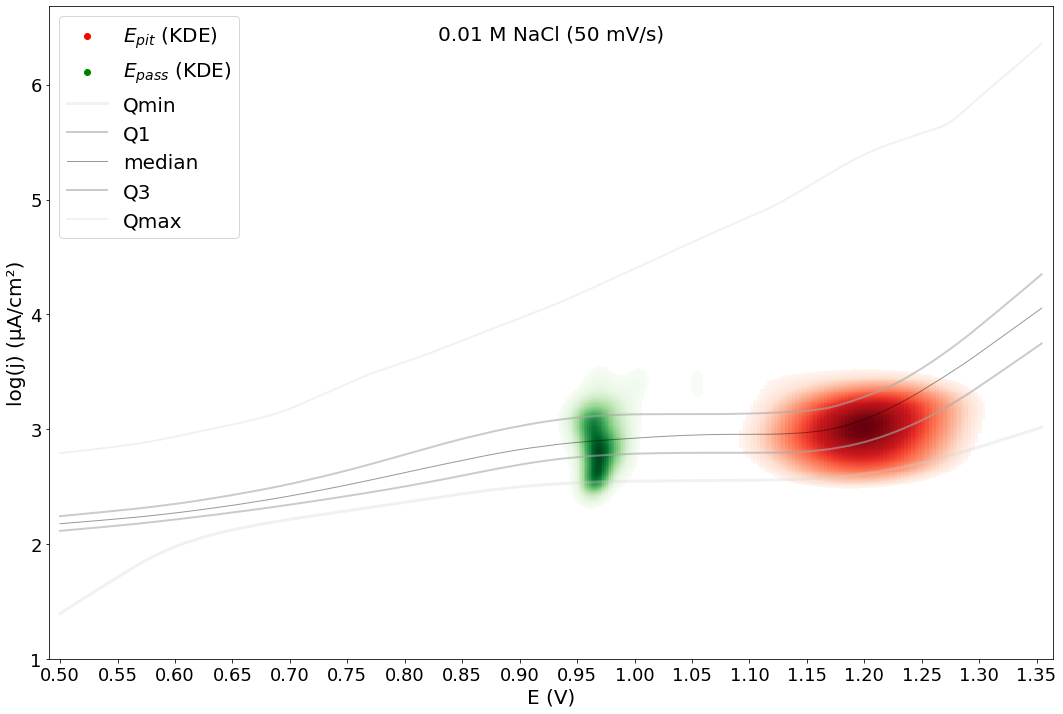

In [61]:
nbins= 300
nbinspass= 200

k2 = kde.gaussian_kde([pit_pass_log["Epass_x"].dropna(),pit_pass_log["Epass_y"].dropna()])
xipass, yipass = np.mgrid[pit_pass_log["Epass_x"].min()-0.08:pit_pass_log["Epass_x"].max()+0.08:nbinspass*1j, pit_pass_log["Epass_y"].min()-0.8:pit_pass_log["Epass_y"].max()+0.8:nbins*1j]
zipass = k2(np.vstack([xipass.flatten(), yipass.flatten()]))
z2 = np.ma.masked_array(zipass, zipass < 1.7)

k = kde.gaussian_kde([pit_pass_log["Epit_x"],pit_pass_log["Epit_y"]])
xipit, yipit = np.mgrid[pit_pass_log["Epit_x"].min()-0.08:pit_pass_log["Epit_x"].max()+0.08:nbins*1j, pit_pass_log["Epit_y"].min():pit_pass_log["Epit_y"].max()+0.08:nbins*1j]
zipit = k(np.vstack([xipit.flatten(), yipit.flatten()]))
z = np.ma.masked_array(zipit, zipit < 1.7)

fig, ax = plt.subplots(figsize=(18, 12))

plt.pcolormesh(xipit, yipit, z.reshape(xipit.shape), shading='auto',cmap="Reds") 

plt.pcolormesh(xipass, yipass, z2.reshape(xipass.shape), shading='auto',cmap="Greens")

ax.scatter(0,0,color="red",label="$E_{pit}$ (KDE)") # plot for the sake of the legend label
ax.scatter(0,0,color="green",label="$E_{pass}$ (KDE)") # plot for the sake of the legend label

ax.plot(E , IQR_ylow_log["Qmin"],color="lightgrey",linewidth=3,label="Qmin",alpha=0.3,zorder=1)    
ax.plot(E , IQR_ylow_log["Q1"], color="darkgray",linewidth=2,label="Q1",alpha=0.6,zorder=1) 
ax.plot(E , IQR_ylow_log["median"], color="k",linewidth=1,label="median",alpha=0.4,zorder=1) 
ax.plot(E , IQR_ylow_log["Q3"],color="darkgray",linewidth=2,label="Q3",alpha=0.6,zorder=1) 
ax.plot(E , IQR_ylow_log["Qmax"], color="lightgrey",linewidth=2,label="Qmax",alpha=0.3,zorder=1) 

ax.legend( loc ="upper left",prop={'size': 20})
ax.set_ylabel("log(j) (µA/cm²)")
ax.set_xlabel("E (V)")
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

ax.set_xticks(np.arange(0.5,1.3544115,0.05)) 
ax.set_xlim(0.5-0.01,1.3544115+0.01) 
ax.set_ylim(np.log10(10), np.log10(4800000)) 

ax.set_title("0.01 M NaCl (50 mV/s)",fontsize = 20, y=0.94)

## Epit and Epass estimations from the IQR and selected quantiles

### Epass

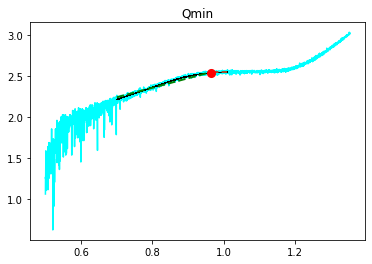

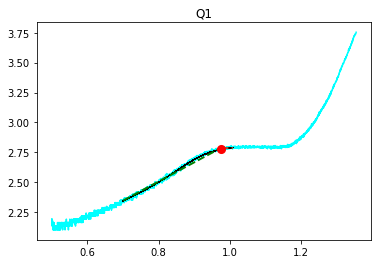

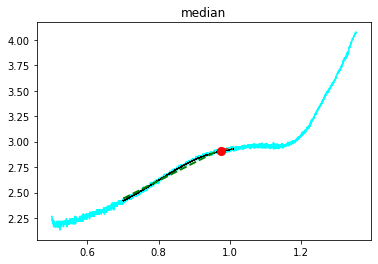

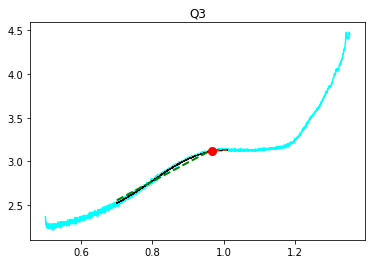

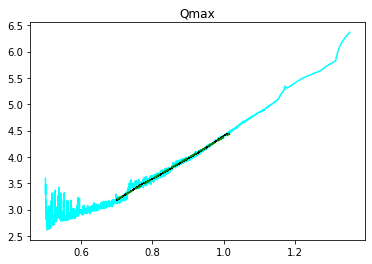

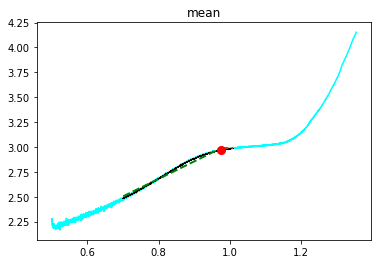

In [62]:
# for avoiding Warnings
plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings('ignore')

column_names =  IQR.columns

#collect all of the slopes and intercepts for the two parts
XIQR_pass_E, XIQR_pass_j = [],[]

#initialise the two models for part 1 and part 2
model1 = LinearRegression()
model2 = LinearRegression()

for (index, column) in enumerate(column_names):
    fig, ax = plt.subplots() 
    
    ax.plot(E , IQR[column], color = "cyan",zorder=1)

    ax.set_title(column)

    #initialise the r2 values
    r2_final1 = 0
    r2_final2 = 0
    
    limits_pass = range(interval_lower_ipass,interval_upper_ipass+1,1)  
     
    for limit in limits_pass:

        ax.plot(E.iloc[limits_pass[0]:limits_pass[-1]+1],IQR_ylow_log[column].iloc[limits_pass[0]:limits_pass[-1]+1], color = "black",linewidth=0.5,zorder=2) # ylow

         #split the data into the first part and second part
        dfE_1 =  E.iloc[limits_pass[0]:limit+1]
        dfE_2 =  E.iloc[limit:limits_pass[-1]+1] 
        dfj_1 =  IQR_ylow_log.iloc[limits_pass[0]:limit+1] 
        dfj_2 =  IQR_ylow_log.iloc[limit:limits_pass[-1]+1] 
        X1 = dfE_1.values.reshape(-1, 1)
        X2 = dfE_2.values.reshape(-1, 1) 
        y1 = dfj_1[column].values.reshape(-1, 1)
        y2 = dfj_2[column].values.reshape(-1, 1) 

    #fit two regression models on the different parts
        regr1 = model1.fit(X1, y1) # [2d arrays]
        regr2 = model2.fit(X2, y2)

    # predict data using a first order linear regression
        y_pred1 = regr1.predict(X1)
        y_pred2 = regr2.predict(X2)

    #check how well the data fits on the training data
        r2_score1 = r2_score(y1, y_pred1) 
        r2_score2 = r2_score(y2, y_pred2)

    #find the best r2 for the different limits (and selecting final: y-hat, df, regr)
        if r2_score1 > r2_final1: 
            r2_final1 = r2_score1
            regr_final1 = regr1

        if r2_score2 > r2_final2: 
            r2_final2 = r2_score2
            regr_final2 = regr2

#find the intersection point for each column
    a1 = regr_final1.coef_[0]
    a2 = regr_final2.coef_[0]
    b1 = regr_final1.intercept_
    b2 = regr_final2.intercept_

    x_intersect = np.around((b1-b2)/(a2-a1),3) # x value
    E_tempo=E.round(3)
    try:
        xi=E_tempo[E_tempo<=x_intersect.item()].index[-1]
    except:
        xi=E_tempo[E_tempo>=x_intersect.item()].index[0]

    try:

        x1_reg=E.iloc[limits_pass[0]:xi+1]
        x2_reg=E.iloc[xi:limits_pass[-1]+1]
        y1_reg = x1_reg*a1 + b1
        y2_reg = x2_reg*a2 + b2      

        ax.plot(x1_reg, y1_reg, linewidth = 2, color = 'green', linestyle = 'dashed')
        ax.plot(x2_reg, y2_reg, linewidth = 2, color = 'sienna', linestyle = 'dashed')
        if column != "Qmax":
            ax.scatter(E.iloc[xi], IQR_ylow_log[column].iloc[xi], marker='.',s=200, c='r',linewidths=2,zorder=3)          
            XIQR_pass_E.append(E.iloc[xi])
            XIQR_pass_j.append(IQR_ylow_log[column].iloc[xi])
        else:
           # ax.scatter(E.iloc[limits_pass[0]], IQR_ylow_log[column].iloc[limits_pass[0]], marker='.',s=200, c='r',linewidths=2,zorder=3)          
            XIQR_pass_E.append(np.nan)
            XIQR_pass_j.append(np.nan)         
    except:
        print(column)

### Epit

Qmax no passivity


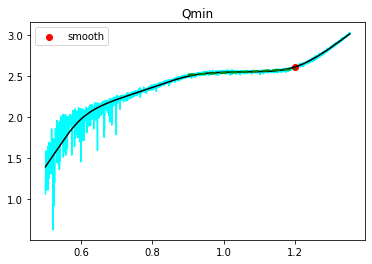

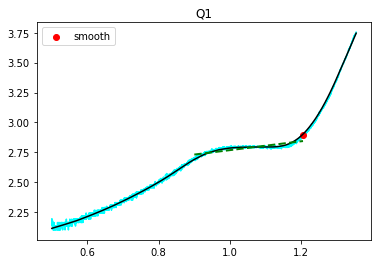

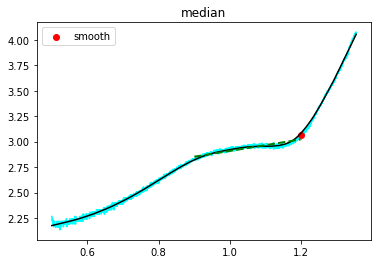

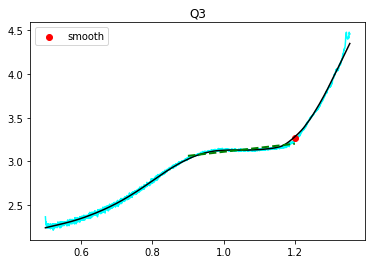

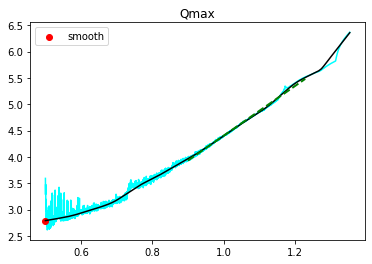

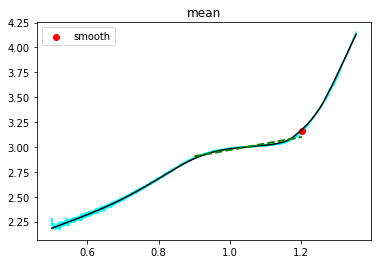

In [63]:
# for avoiding Warnings
plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings('ignore')

column_names =  IQR.columns

#collect all of the slopes and intercepts for the two parts
XIQR_pit_E, XIQR_pit_j = [],[]

#initialise the two models for part 1 and part 2
model1 = LinearRegression()
model2 = LinearRegression()

for index, column in enumerate(column_names):
    fig, ax = plt.subplots() 
    
    ax.plot(E , IQR[column], color = "cyan",zorder=1)
    ax.set_title(column)

    #initialise the r2 values
    r2_final1 = 0
    r2_final2 = 0
    
    limits_pit = range(interval_lower_i,interval_upper_i+1,1) 
            
    for limit in limits_pit:

    #split the data into the first part and second part
        dfE_1 =  E.iloc[Epass_estimated_i:limit+1]
        dfj_1 =  IQR_ylow_log.iloc[Epass_estimated_i:limit+1]

        dfE_2 =  E.iloc[limit:]
        dfj_2 =  IQR_ylow_log.iloc[limit:]

        X1 = dfE_1.values.reshape(-1, 1)
        X2 = dfE_2.values.reshape(-1, 1)
        y1 = dfj_1[column].values.reshape(-1, 1)
        y2 = dfj_2[column].values.reshape(-1, 1)

        #fit two regression models on the different parts
        regr1 = model1.fit(X1, y1) 
        regr2 = model2.fit(X2, y2)

    # predict data using a first order linear regression
        y_pred1 = regr1.predict(X1)
        y_pred2 = regr2.predict(X2)

        #check how well the data fits on the training data
        r2_score1 = r2_score(y1, y_pred1) 
        r2_score2 = r2_score(y2, y_pred2)

        #find the best r2 for the different limits 
        if r2_score1 > r2_final1: 
            r2_final1 = r2_score1
            regr_final1 = regr1

        if r2_score2 > r2_final2: 
            r2_final2 = r2_score2
            regr_final2 = regr2

#find the intersection point for each column
    a1 = regr_final1.coef_[0]
    a2 = regr_final2.coef_[0]
    b1 = regr_final1.intercept_
    b2 = regr_final2.intercept_

    x_intersect = np.around((b1-b2)/(a2-a1),3) # x value
    E_tempo=E.round(3)
    try:
        xi=E_tempo[E_tempo<=x_intersect.item()].index[-1]
    except:
        xi=E_tempo[E_tempo>=x_intersect.item()].index[0]

    try:
     
        ax.plot(E , IQR_ylow_log[column], color = "black",zorder=2)
        x1_reg=E.iloc[Epass_estimated_i:xi+1]
        x2_reg=E.iloc[xi:limits_pit[-1]+1]
        y1_reg = x1_reg*a1 + b1
        y2_reg = x2_reg*a2 + b2
   
        ax.plot(x1_reg, y1_reg, linewidth = 2, color = 'green', linestyle = 'dashed')
        ax.plot(x2_reg, y2_reg, linewidth = 2, color = 'sienna', linestyle = 'dashed')
        if column != "Qmax":
            ax.scatter(E.iloc[xi],np.mean([IQR[column].iloc[xi],IQR_ylow_log[column].iloc[xi]]),color="red",label="smooth")
            ax.legend() # Epass_j --> the mean between ylow and df_log
            XIQR_pit_E.append(E.iloc[xi])
            XIQR_pit_j.append(np.mean([IQR[column].iloc[xi],IQR_ylow_log[column].iloc[xi]])) # mean ylow log
        else:
            print(str(column)+" no passivity") # E.iloc[0]
            ax.scatter(E.iloc[0],IQR_ylow_log[column].iloc[0],color="red",label="smooth")
            ax.legend()
            XIQR_pit_E.append(E.iloc[0])
            XIQR_pit_j.append(IQR_ylow_log[column].iloc[0])

    except: 
        print(column)

#### storing the Epit (x,y) and Epass (x,y) values of the IQR curves in a df 

In [69]:
pit_pass_IQR = pd.DataFrame({"Epit_x":XIQR_pit_E,"Epit_y":XIQR_pit_j,"Epass_x":XIQR_pass_E,"Epass_y":XIQR_pass_j})
pit_pass_IQR.index=IQR.columns
pit_pass_IQR.index.name="IQR"
pit_pass_IQR

Epit_x    Epit_y   Epass_x   Epass_y
IQR                                           
Qmin    1.201209  2.613911  0.964385  2.539148
Q1      1.205176  2.894868  0.976287  2.775829
median  1.198462  3.066056  0.976287  2.905982
Q3      1.200293  3.266543  0.966216  3.114569
Qmax    0.499893  2.791139       NaN       NaN
mean    1.202124  3.165346  0.974456  2.966908

## central tendency estimates of Epass/log(jpass) and Epit/log(jpit)
### comparison of estimates from the maximum KDE (ground truth) with the median and mean proxy models

In [10]:
#median absolute deviation 
from scipy.stats import median_abs_deviation

df_mad=median_abs_deviation(df_log,axis=1)

Text(0.5, 1.0, '0.01 M NaCl (50 mV/s)')

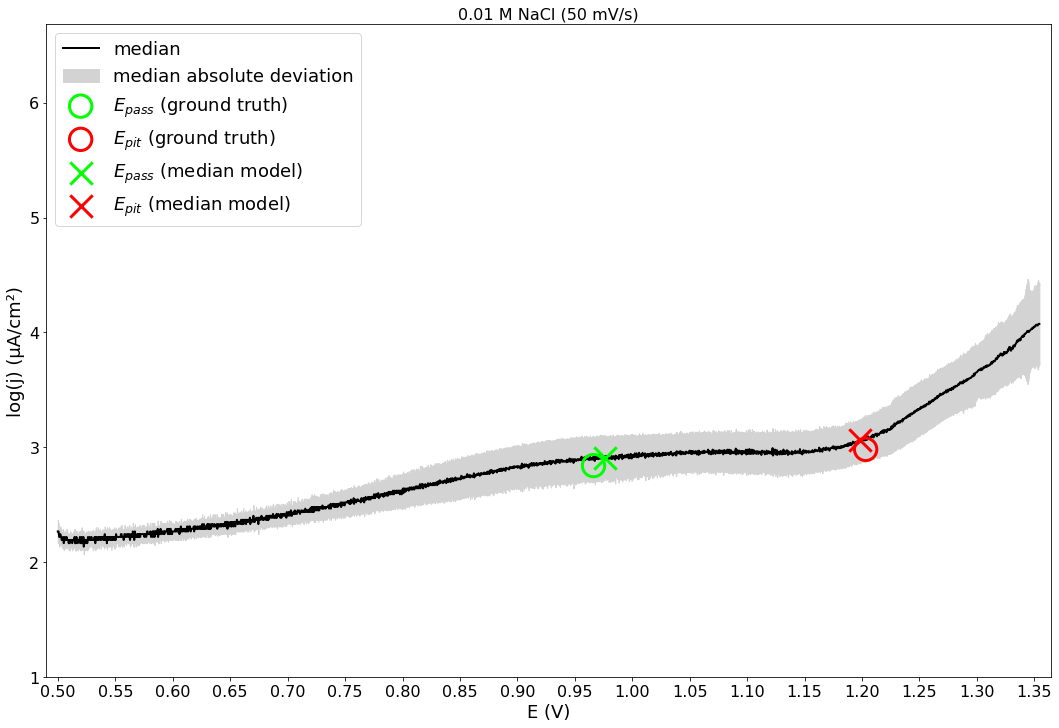

In [63]:
fig, ax = plt.subplots(figsize=(18, 12))

ax.plot(E,IQR["median"], color="k",linewidth=2,label="median")
ax.fill_between(E, IQR["median"]-df_mad, IQR["median"]+df_mad,color="lightgrey",label="median absolute deviation")

ax.scatter(Epass_x_kde,Epass_y_kde,marker="o",facecolors='none',edgecolors="lime",s=500,label="$E_{pass}$ (ground truth)",linewidths=3,zorder=2)
ax.scatter(Epit_x_kde,Epit_y_kde,marker="o",facecolors='none',edgecolors="r",s=500,label="$E_{pit}$ (ground truth)",linewidths=3,zorder=2)

ax.scatter(pit_pass_IQR.loc["median"]["Epass_x"],pit_pass_IQR.loc["median"]["Epass_y"],marker="x",c="lime",s=500,label="$E_{pass}$ (median model)",linewidths=3,zorder=2)
ax.scatter(pit_pass_IQR.loc["median"]["Epit_x"],pit_pass_IQR.loc["median"]["Epit_y"],marker="x",c="red",s=500,label="$E_{pit}$ (median model)",linewidths=3,zorder=2)

ax.legend( loc ="upper left",prop={'size': 18})
ax.set_ylabel("log(j) (µA/cm²)")
ax.set_xlabel("E (V)")
ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

ax.set_xticks(np.arange(0.5,1.3544115,0.05)) 
ax.set_xlim(0.5-0.01,1.3544115+0.01) 
ax.set_ylim(np.log10(10), np.log10(4800000)) 

ax.set_title("0.01 M NaCl (50 mV/s)",fontsize = 16)

In [11]:
#standard deviation 
df_std=np.std(df_log,axis=1)
    
#standard error of the mean 
from scipy.stats import sem
df_sem=sem(df_log,axis=1) 

Text(0.5, 1.0, '0.01 M NaCl (50 mV/s)')

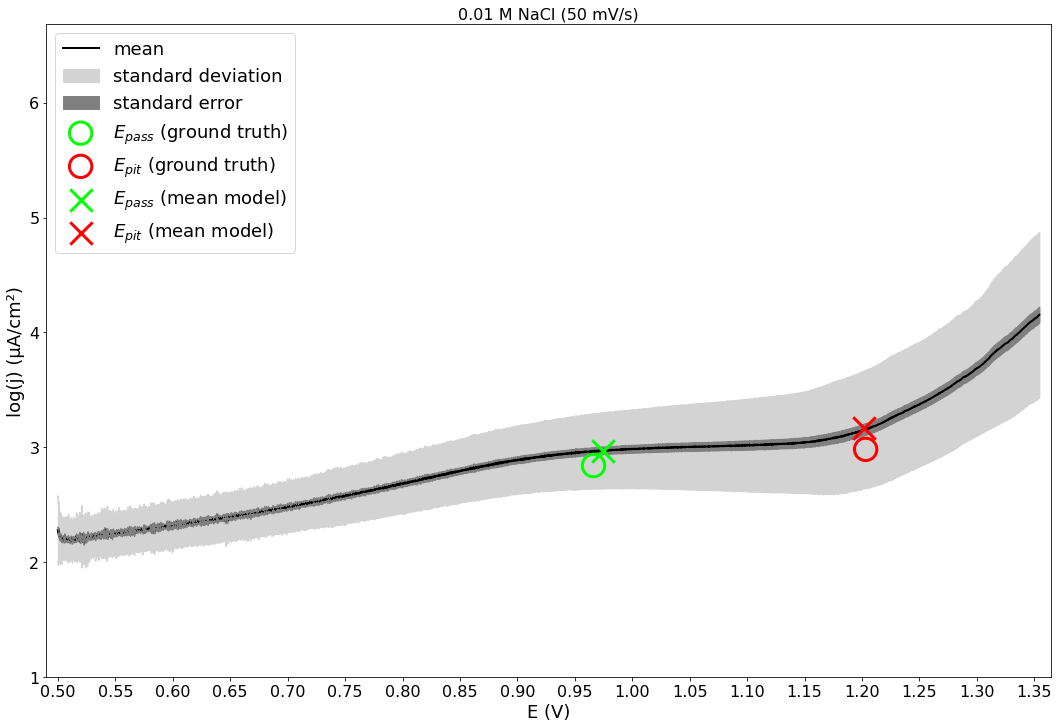

In [24]:
fig, ax = plt.subplots(figsize=(18, 12))
ax.plot(E,m, color="k",linewidth=2,label="mean")

ax.plot(E,m+df_std, color="lightgrey",linewidth=1)
ax.plot(E,m-df_std, color="lightgrey",linewidth=1)
ax.fill_between(E,  m-df_std, m+df_std,color="lightgrey",label="standard deviation")

ax.plot(E,m+df_sem, color="grey",linewidth=1)
ax.plot(E,m-df_sem, color="grey",linewidth=1)
ax.fill_between(E, m-df_sem, m+df_sem,color="grey",label="standard error")

ax.scatter(Epass_x_kde,Epass_y_kde,marker="o",facecolors='none',edgecolors="lime",s=500,label="$E_{pass}$ (ground truth)",linewidths=3,zorder=2)
ax.scatter(Epit_x_kde,Epit_y_kde,marker="o",facecolors='none',edgecolors="r",s=500,label="$E_{pit}$ (ground truth)",linewidths=3,zorder=2)

ax.scatter(pit_pass_IQR.loc["mean"]["Epass_x"],pit_pass_IQR.loc["mean"]["Epass_y"],marker="x",c="lime",s=500,linewidths=3,zorder=2,label="$E_{pass}$ (mean model)")
ax.scatter(pit_pass_IQR.loc["mean"]["Epit_x"],pit_pass_IQR.loc["mean"]["Epit_y"],marker="x",c="red",s=500,label="$E_{pit}$ (mean model)",linewidths=3,zorder=2)

ax.legend( loc ="upper left",prop={'size': 18})
ax.set_ylabel("log(j) (µA/cm²)")
ax.set_xlabel("E (V)")
ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

ax.set_xticks(np.arange(0.5,1.3544115,0.05)) 
ax.set_xlim(0.5-0.01,1.3544115+0.01) 
ax.set_ylim(np.log10(10), np.log10(4800000)) 

ax.set_title("0.01 M NaCl (50 mV/s)",fontsize = 16)

### storing the ground truth values of Epass/log(jpass) and Epit/log(jpit) and the mean-/median-based estimates in a df (and exporting it as a CSV file)

In [76]:
residuals_mean_median = pd.DataFrame(
[[Epass_x_kde,
Epass_y_kde,
Epit_x_kde,
Epit_y_kde,
pit_pass_IQR.loc["median"]["Epass_x"],
pit_pass_IQR.loc["median"]["Epass_y"],
pit_pass_IQR.loc["median"]["Epit_x"],
pit_pass_IQR.loc["median"]["Epit_y"],
pit_pass_IQR.loc["mean"]["Epass_x"],
pit_pass_IQR.loc["mean"]["Epass_y"],
pit_pass_IQR.loc["mean"]["Epit_x"],
pit_pass_IQR.loc["mean"]["Epit_y"],
Epass_x_kde-pit_pass_IQR.loc["median"]["Epass_x"],
Epass_y_kde-pit_pass_IQR.loc["median"]["Epass_y"],
Epit_x_kde-pit_pass_IQR.loc["median"]["Epit_x"],
Epit_y_kde-pit_pass_IQR.loc["median"]["Epit_y"],
Epass_x_kde-pit_pass_IQR.loc["mean"]["Epass_x"],
Epass_y_kde-pit_pass_IQR.loc["mean"]["Epass_y"],
Epit_x_kde-pit_pass_IQR.loc["mean"]["Epit_x"],
Epit_y_kde-pit_pass_IQR.loc["mean"]["Epit_y"]]], 
columns=["Epass","jpass","Epit","jpit",
        'median Epass','median jpass','median Epit','median jpit','mean Epass','mean jpass','mean Epit','mean jpit',
        'median Epass res','median jpass res','median Epit res','median jpit res','mean Epass res','mean jpass res','mean Epit res','mean jpit res'],
index=[2])
# choosing the directory 
os.chdir(r"C:\Users\lbertolu\OneDrive - Vrije Universiteit Brussel\ULB\SECCM tests\pitting statistics paper draft\pape2")
residuals_mean_median.to_csv('residuals_mean_median_001_50.csv', index=True)
residuals_mean_median

Epass     jpass      Epit      jpit  median Epass  median jpass  \
2  0.96628  2.839609  1.203164  2.980759      0.976287      2.905982   

   median Epit  median jpit  mean Epass  mean jpass  mean Epit  mean jpit  \
2     1.198462     3.066056    0.974456    2.966908   1.202124   3.165346   

   median Epass res  median jpass res  median Epit res  median jpit res  \
2         -0.010007         -0.066373         0.004702        -0.085297   

   mean Epass res  mean jpass res  mean Epit res  mean jpit res  
2       -0.008176       -0.127299        0.00104      -0.184588